In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("/content/Used Car Dataset.csv")

print("Basic Information:")
print(df.info())


print("\nSummary Statistics:")
print(df.describe())

print("\nShape of the Dataset:")
print(df.shape)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
m

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

In [3]:
df.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

In [4]:
df = df.dropna()

In [5]:

df = df.drop('Unnamed: 0', axis=1)
df.isnull().sum()



car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
dtype: int64

In [6]:
df

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75


In [7]:
import pandas as pd

# Assuming your dataframe is 'df' and the registration_year column is in 'df['registration_year']'
# Convert 'Aug-20', 'July-2017', etc., to a consistent format

# Convert 'Aug-20' to '2020-08-01'
df['registration_year'] = pd.to_datetime(df['registration_year'], format='%b-%y', errors='coerce')

# Convert 'July-2017' to '2017-07-01'
df['registration_year'] = pd.to_datetime(df['registration_year'], format='%b-%Y', errors='coerce')

# Convert '2022' to '2022-01-01'
df['registration_year'] = pd.to_datetime(df['registration_year'], format='%Y', errors='coerce')

# Print the resulting dataframe
print(df[['registration_year']])


     registration_year
0           2017-07-01
1           2021-01-01
2           2018-09-01
3           2019-12-01
4           2019-08-01
...                ...
1548        2020-08-01
1549               NaT
1550        2017-06-01
1551        2018-05-01
1552        2018-05-01

[1549 rows x 1 columns]


In [8]:
df.isnull().sum()

car_name                0
registration_year     145
insurance_validity      0
fuel_type               0
seats                   0
kms_driven              0
ownsership              0
transmission            0
manufacturing_year      0
mileage(kmpl)           0
engine(cc)              0
max_power(bhp)          0
torque(Nm)              0
price(in lakhs)         0
dtype: int64

In [9]:

df['registration_year'].fillna(df['registration_year'].mean(), inplace=True)


In [10]:
df.isnull().sum()

car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
dtype: int64

In [11]:
df.dtypes

car_name                      object
registration_year     datetime64[ns]
insurance_validity            object
fuel_type                     object
seats                          int64
kms_driven                     int64
ownsership                    object
transmission                  object
manufacturing_year            object
mileage(kmpl)                float64
engine(cc)                   float64
max_power(bhp)               float64
torque(Nm)                   float64
price(in lakhs)              float64
dtype: object

In [12]:
# Display summary statistics of numeric columns
print(df.describe())

# Display summary statistics of categorical columns
print(df.describe(include='O'))


             seats     kms_driven  mileage(kmpl)    engine(cc)  \
count   1549.00000    1549.000000    1549.000000  1.549000e+03   
mean      91.70368   52871.165268     237.067966  1.472808e+10   
std     2406.52323   40103.619123     586.127342  2.186332e+11   
min        4.00000     620.000000       7.810000  1.700000e+01   
25%        5.00000   30000.000000      16.340000  1.197000e+03   
50%        5.00000   49000.000000      18.900000  1.462000e+03   
75%        5.00000   70000.000000      22.000000  1.995000e+03   
max    67000.00000  810000.000000    3996.000000  3.258640e+12   

       max_power(bhp)    torque(Nm)  price(in lakhs)  
count    1.549000e+03  1.549000e+03      1549.000000  
mean     1.472808e+10  1.423989e+04       166.519258  
std      2.186332e+11  9.666241e+04      3483.338542  
min      1.700000e+01  5.000000e+00         1.000000  
25%      1.197000e+03  4.000000e+02         4.700000  
50%      1.462000e+03  1.173000e+03         7.140000  
75%      1.995000e+0

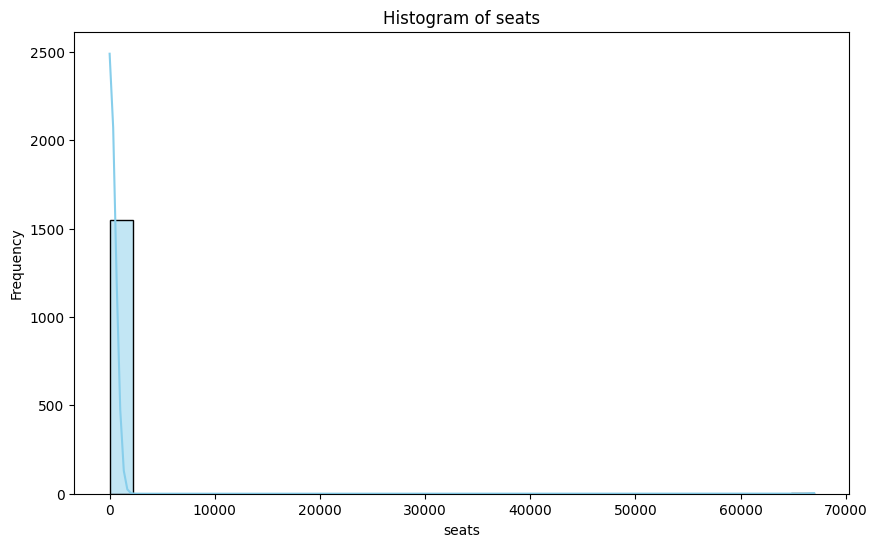

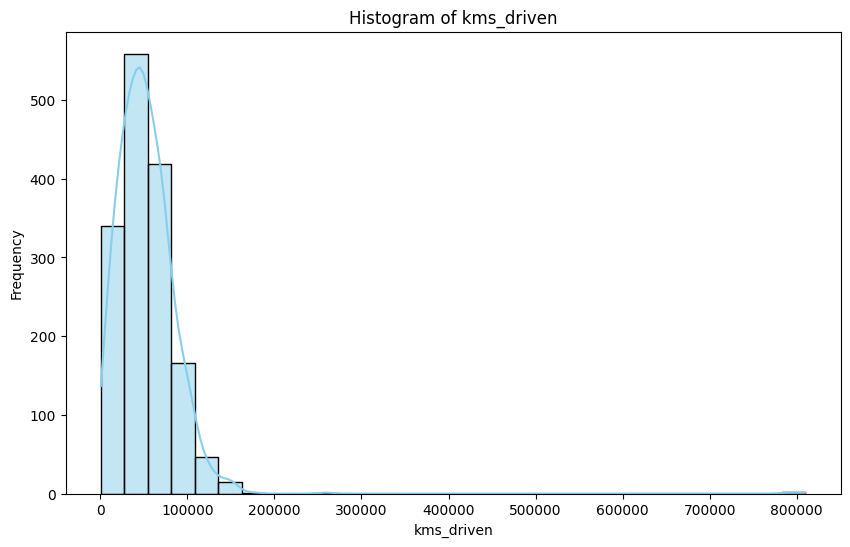

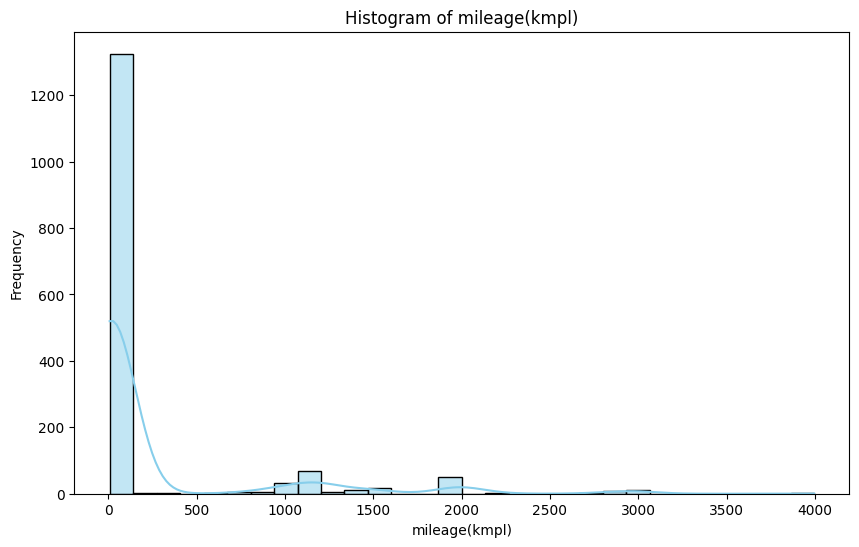

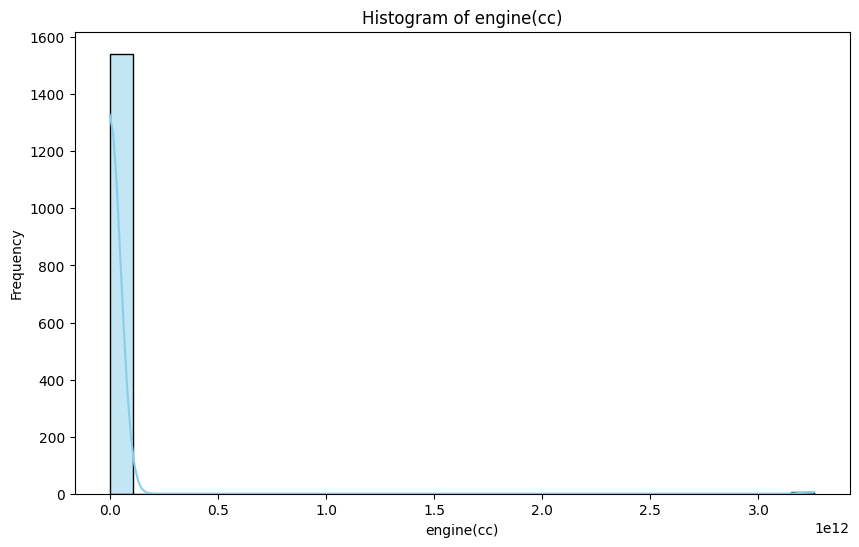

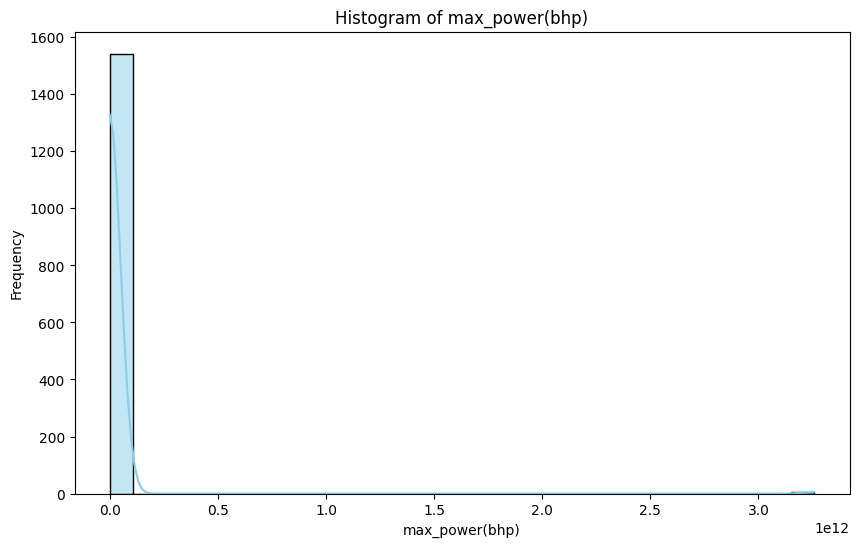

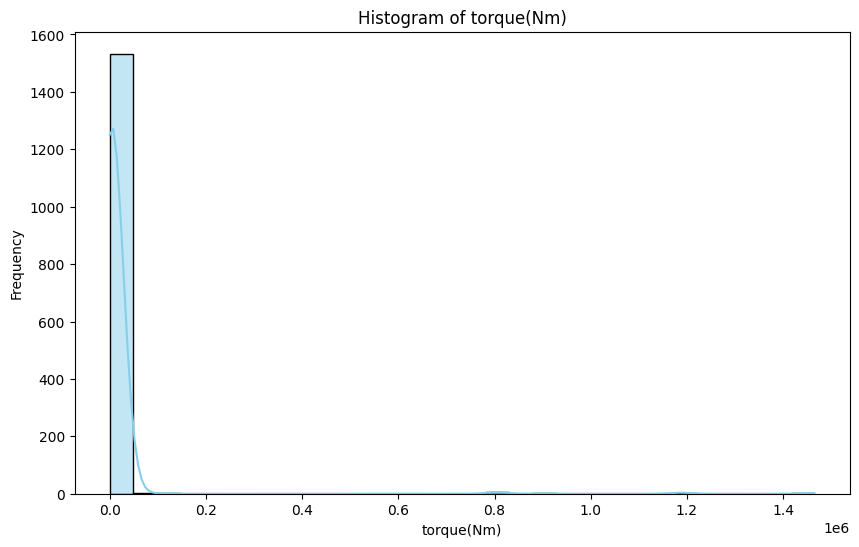

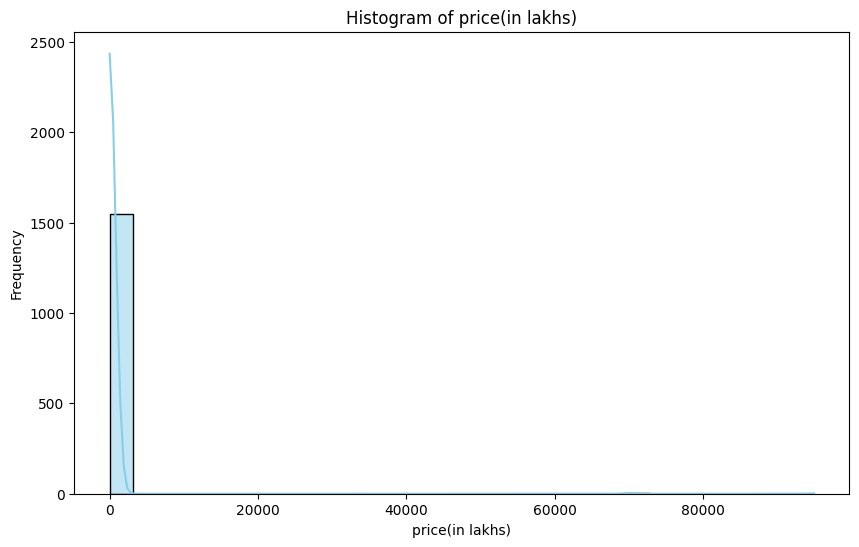

In [13]:
# Histograms for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
for column in numeric_columns.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


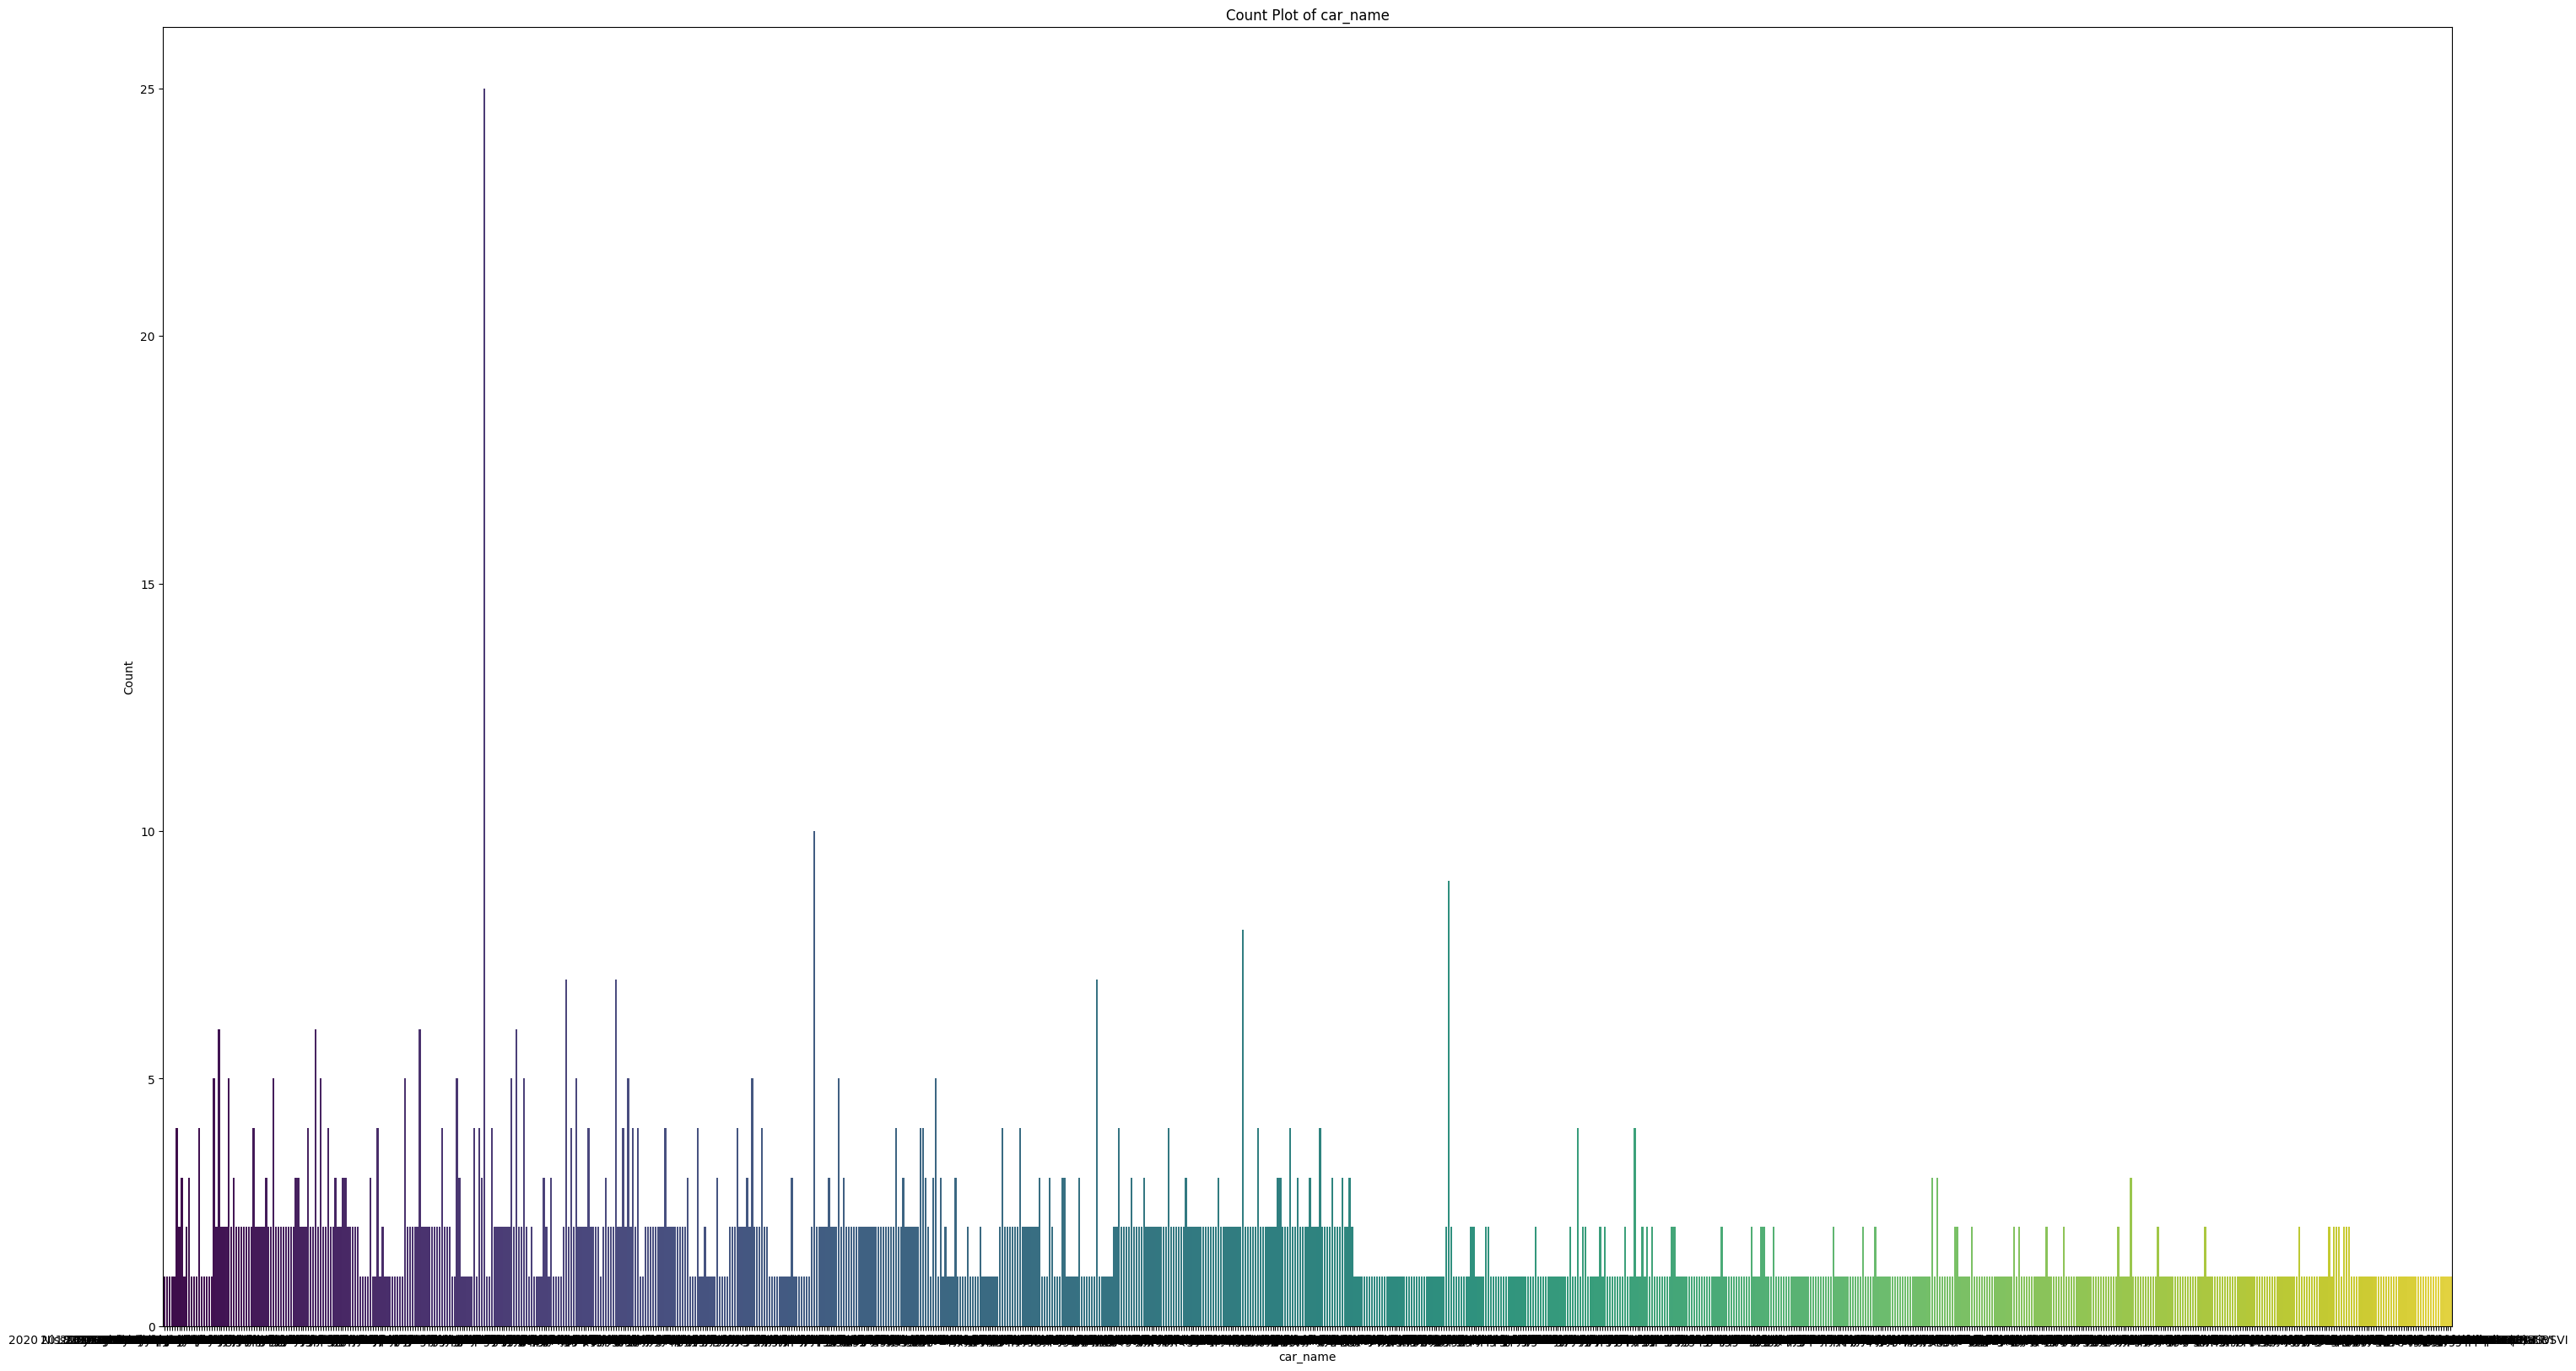

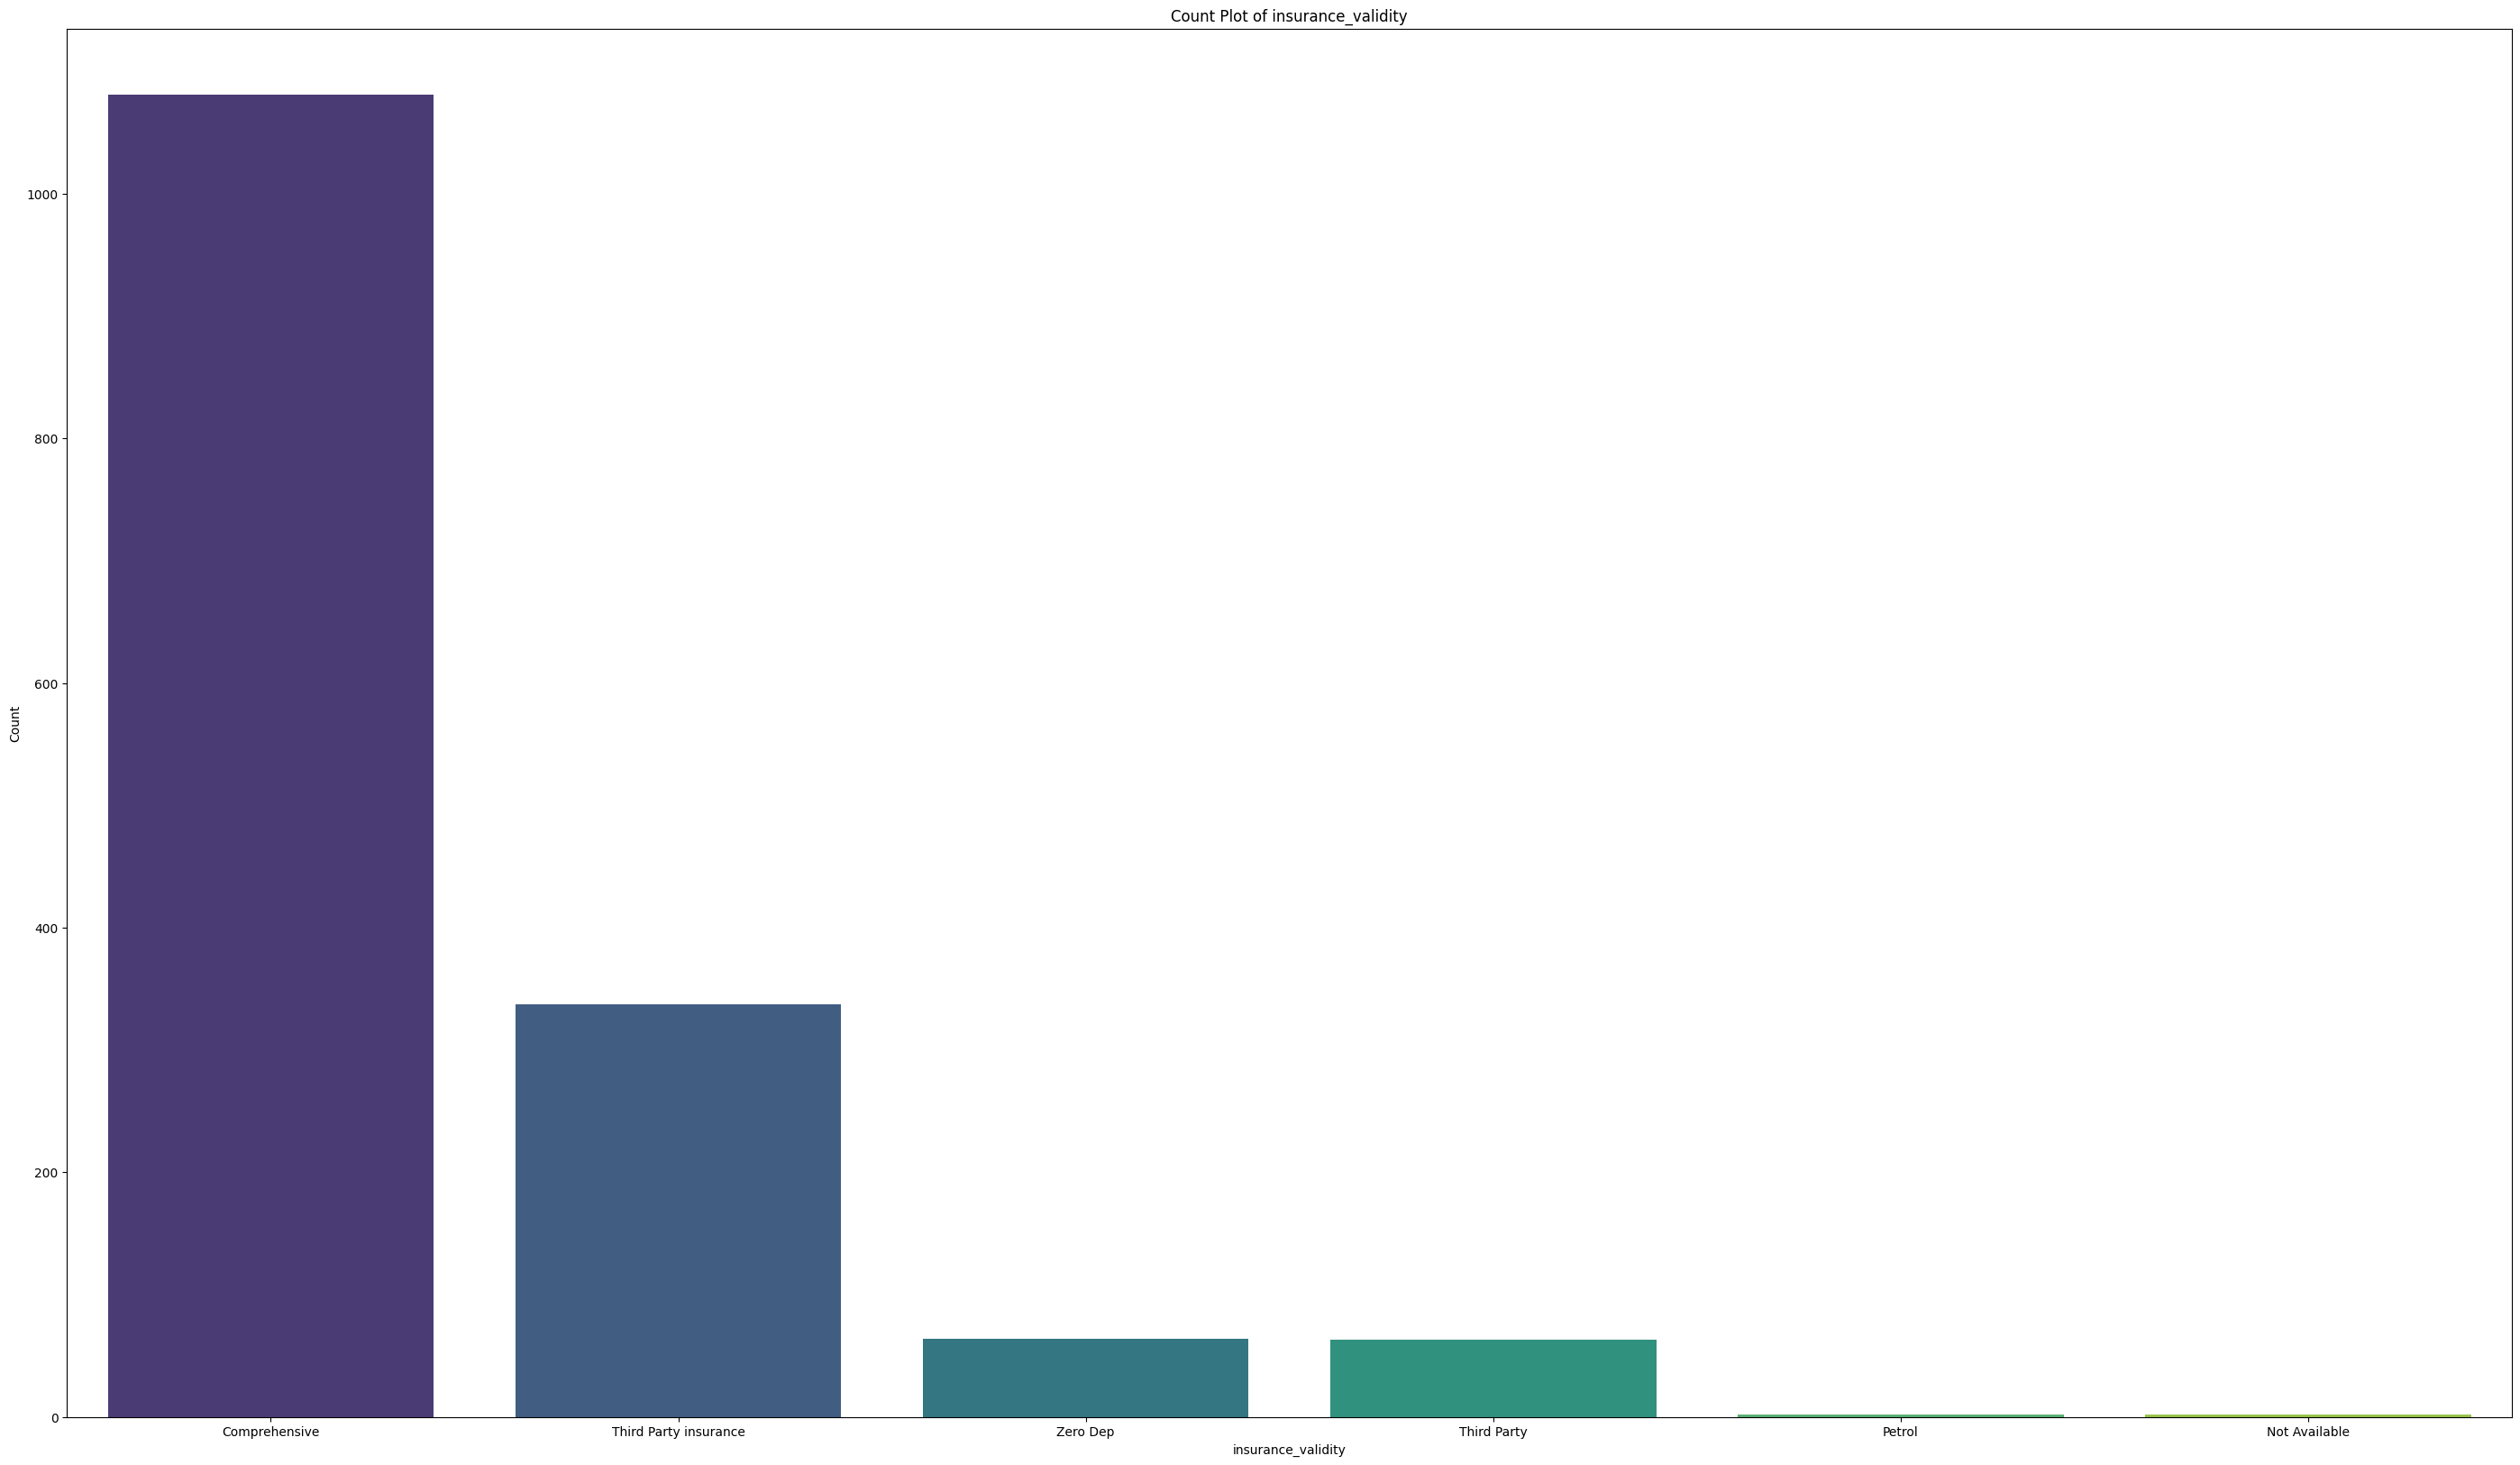

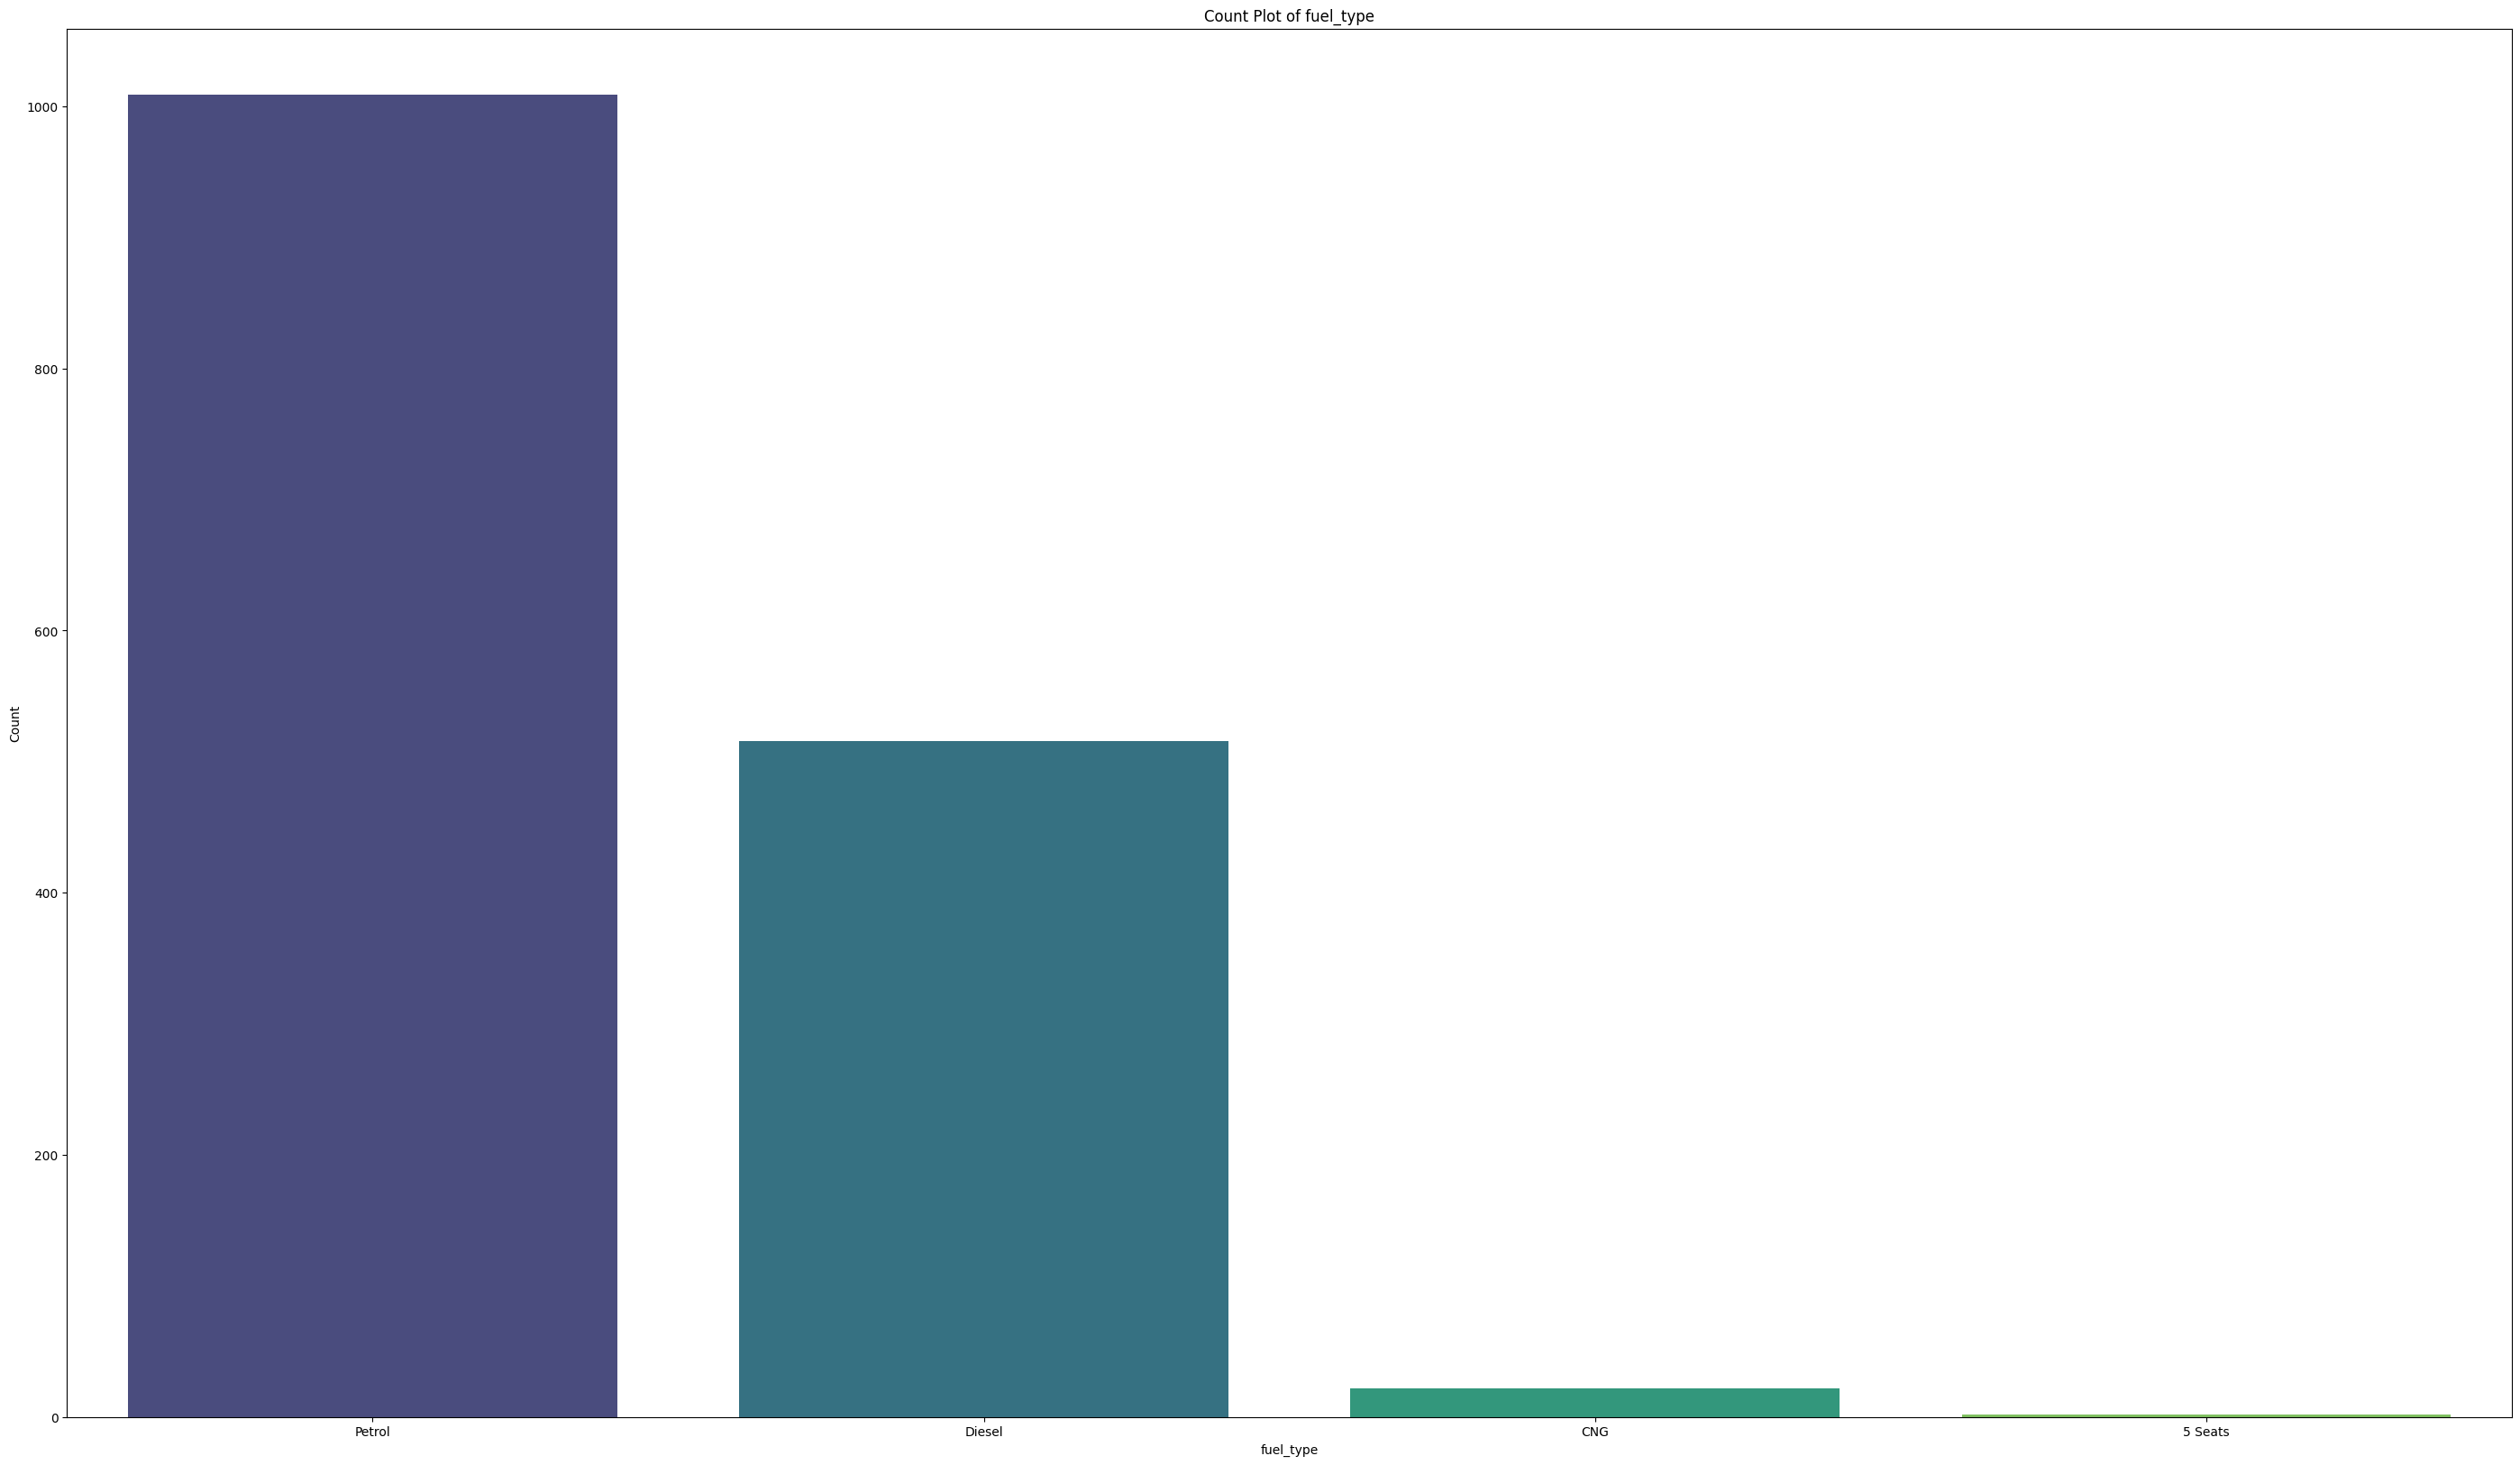

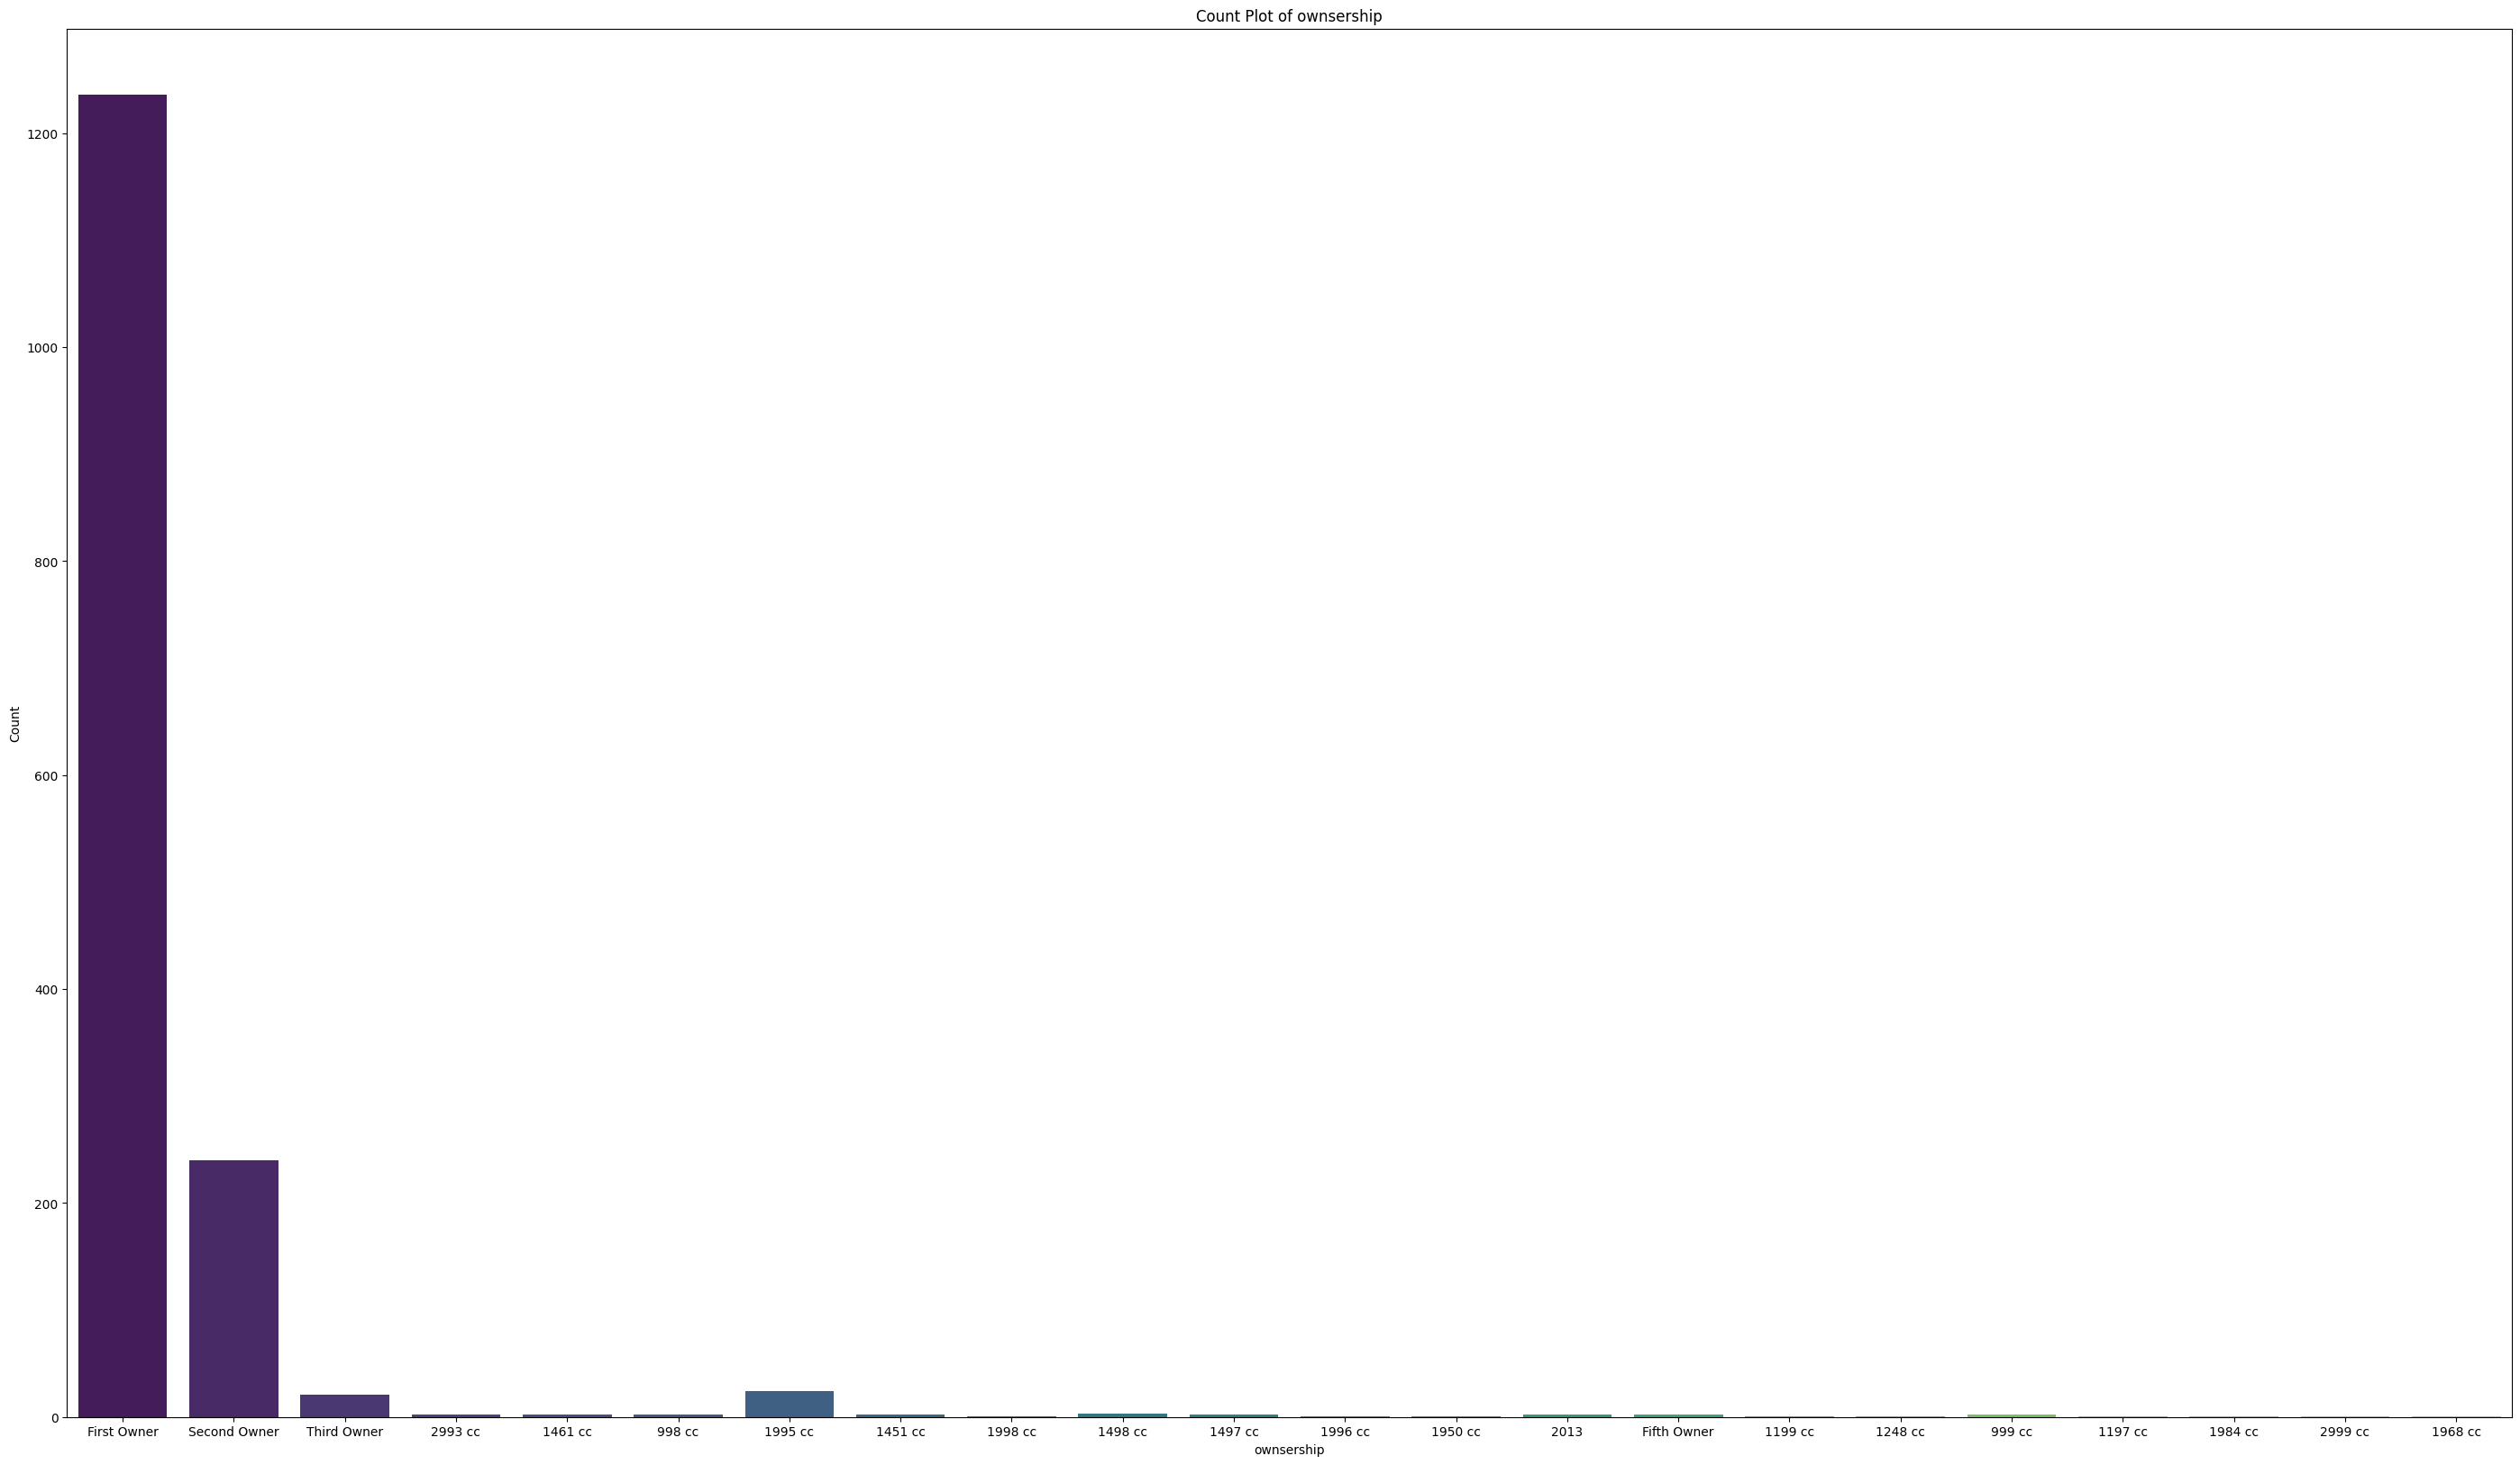

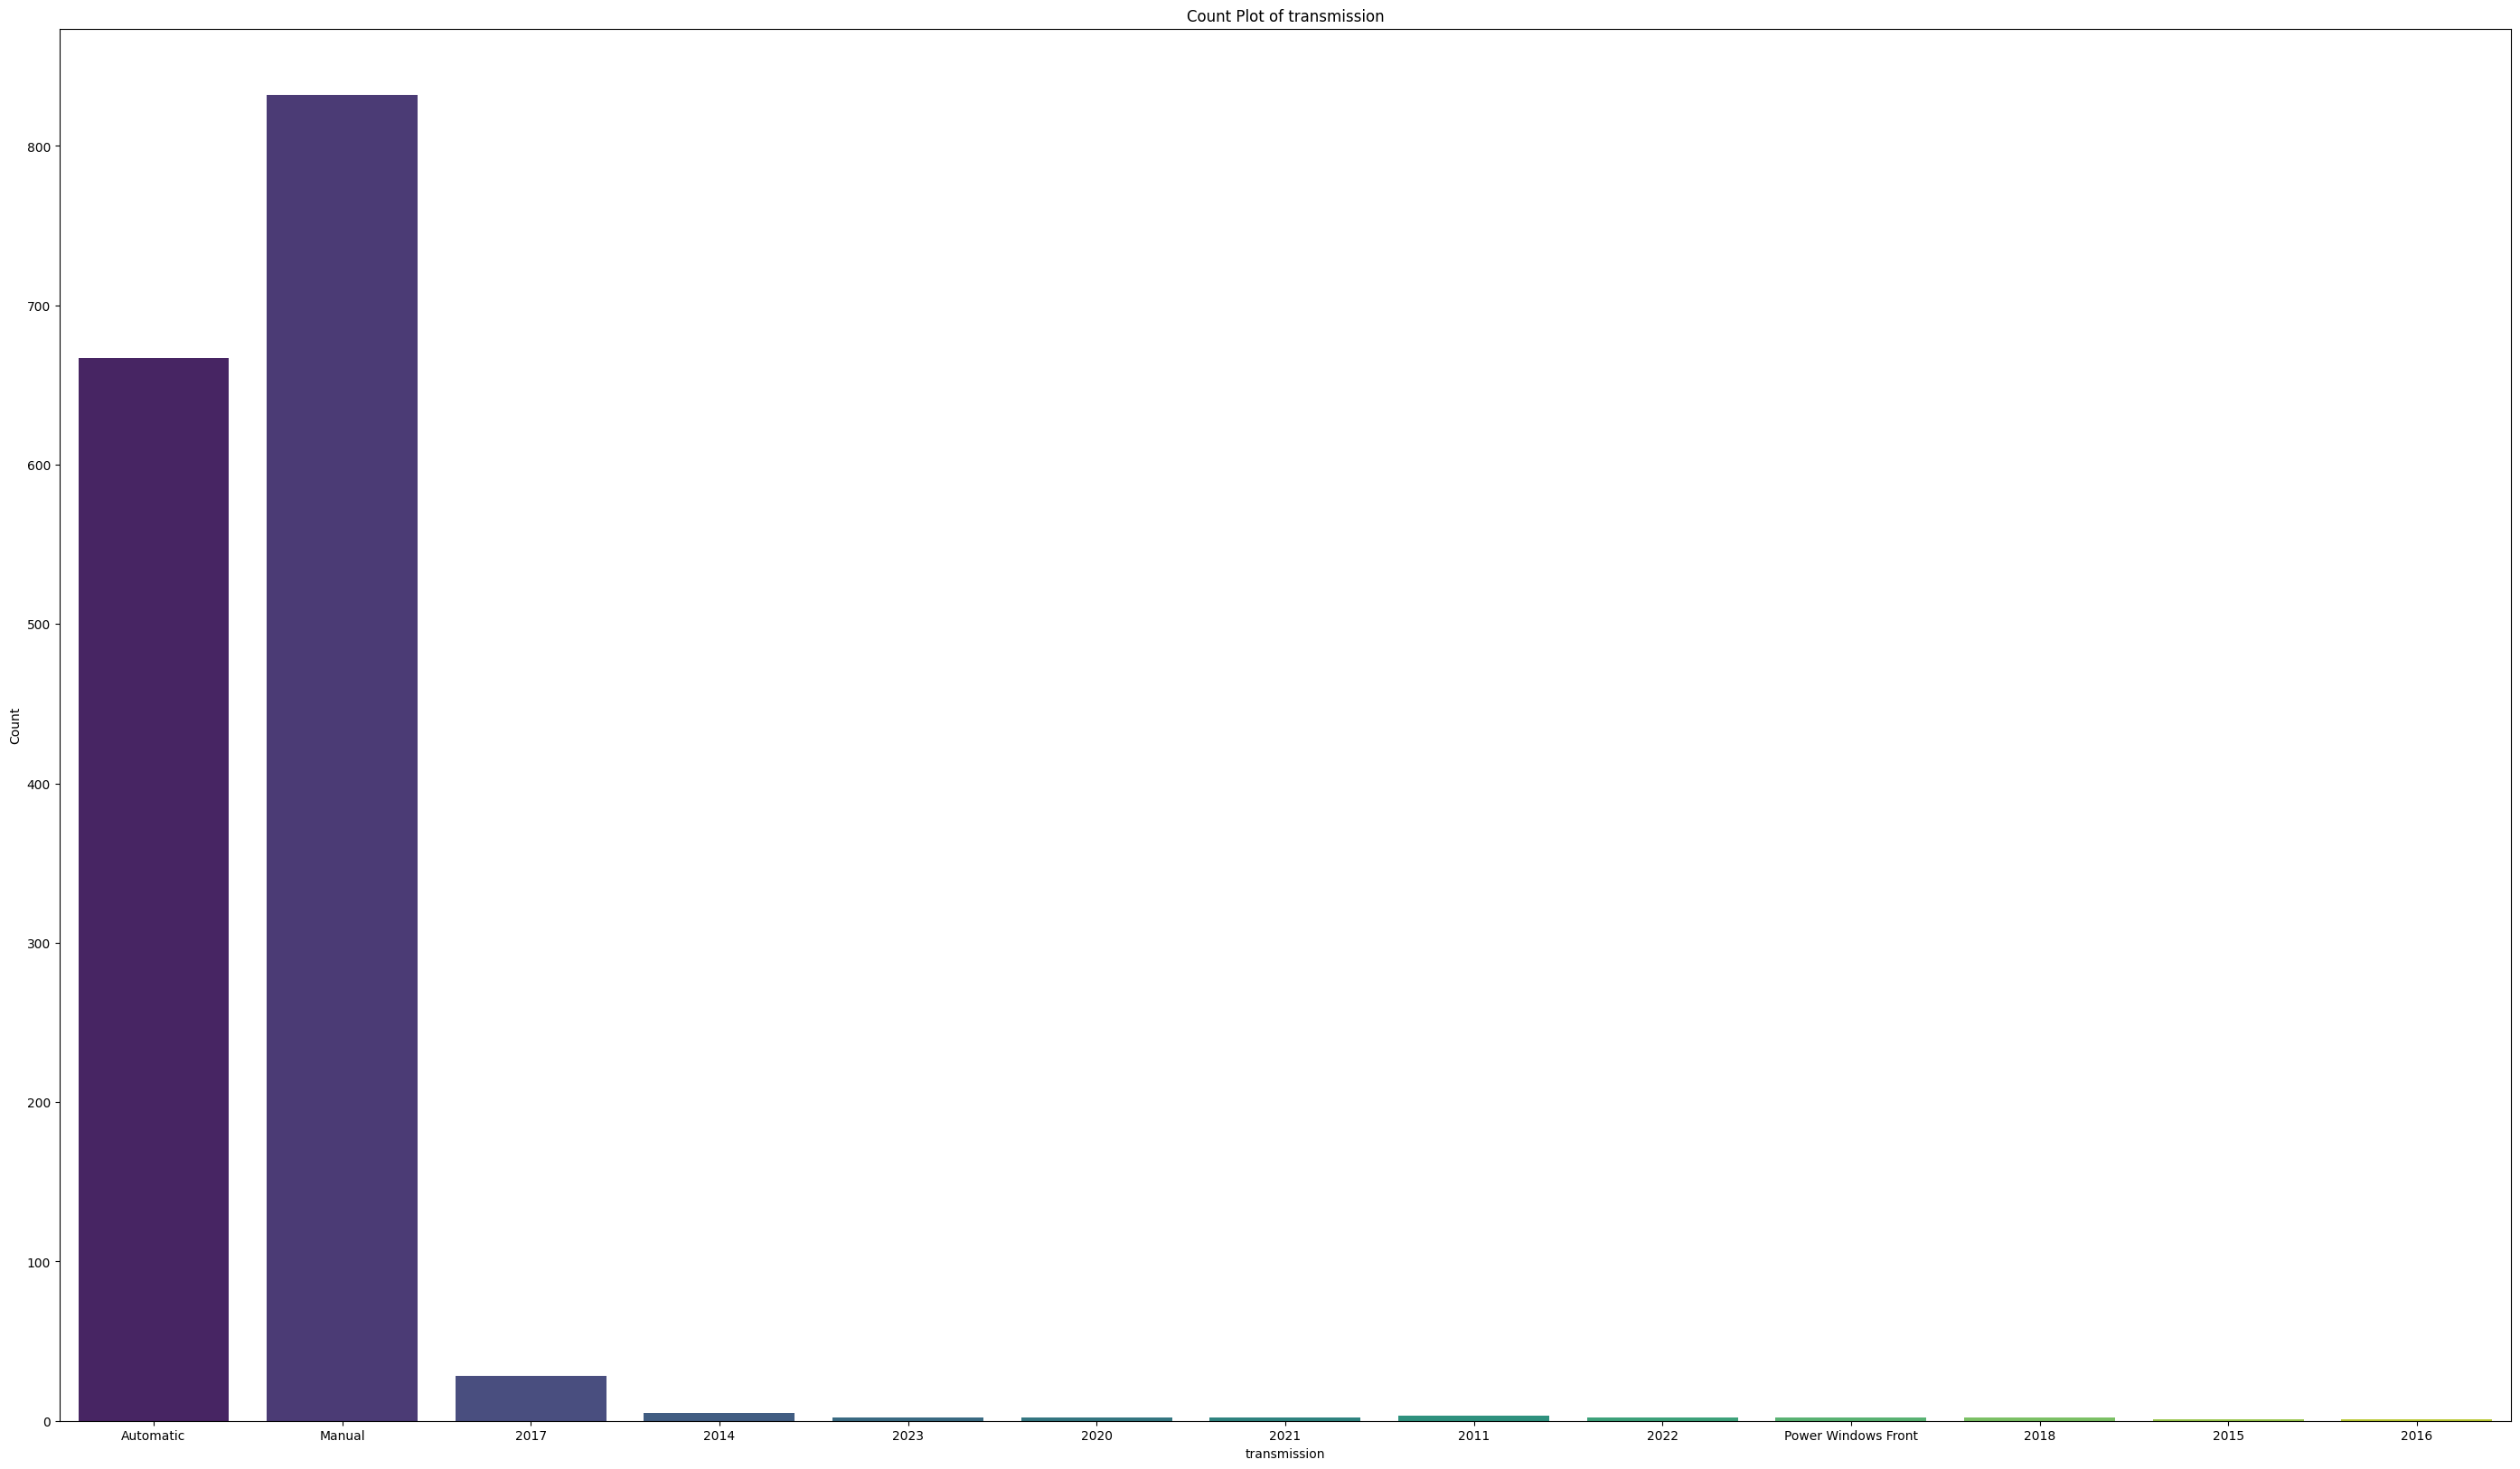

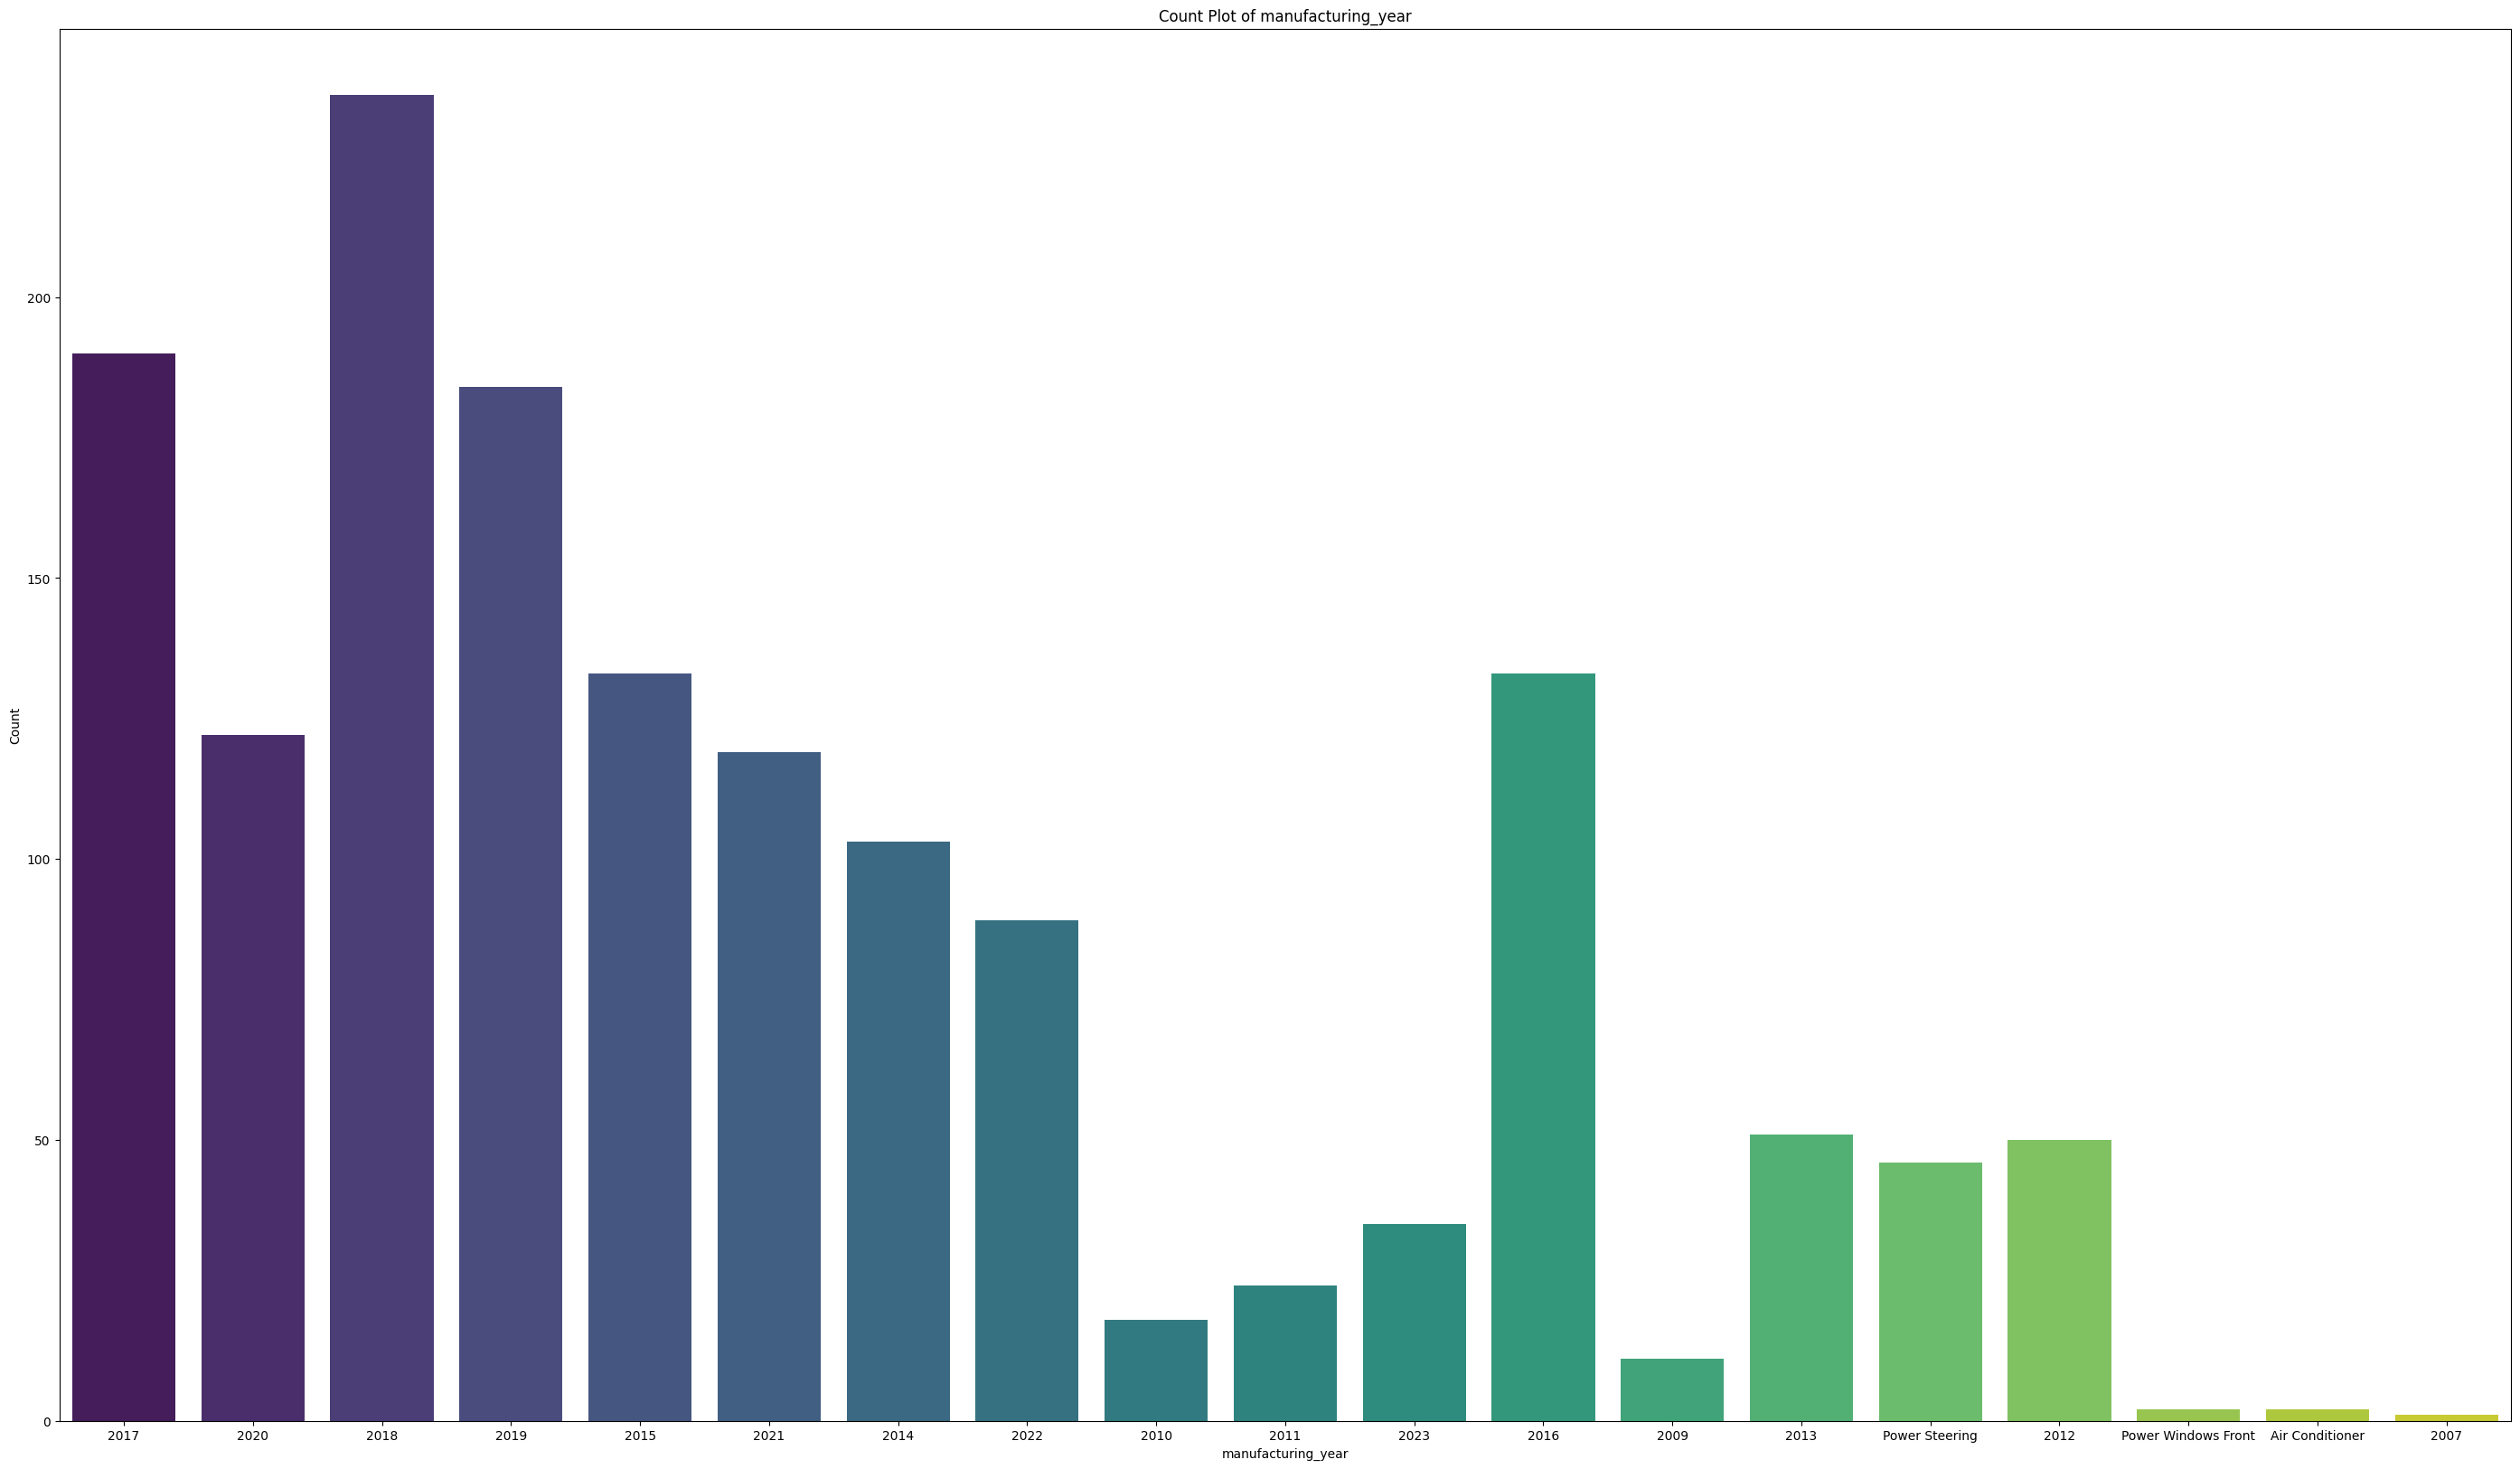

In [14]:
# Count plots for categorical columns
categorical_columns = df.select_dtypes(include='O')
for column in categorical_columns.columns:
    plt.figure(figsize=(35, 20))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


<ipython-input-15-2c87add2c64c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


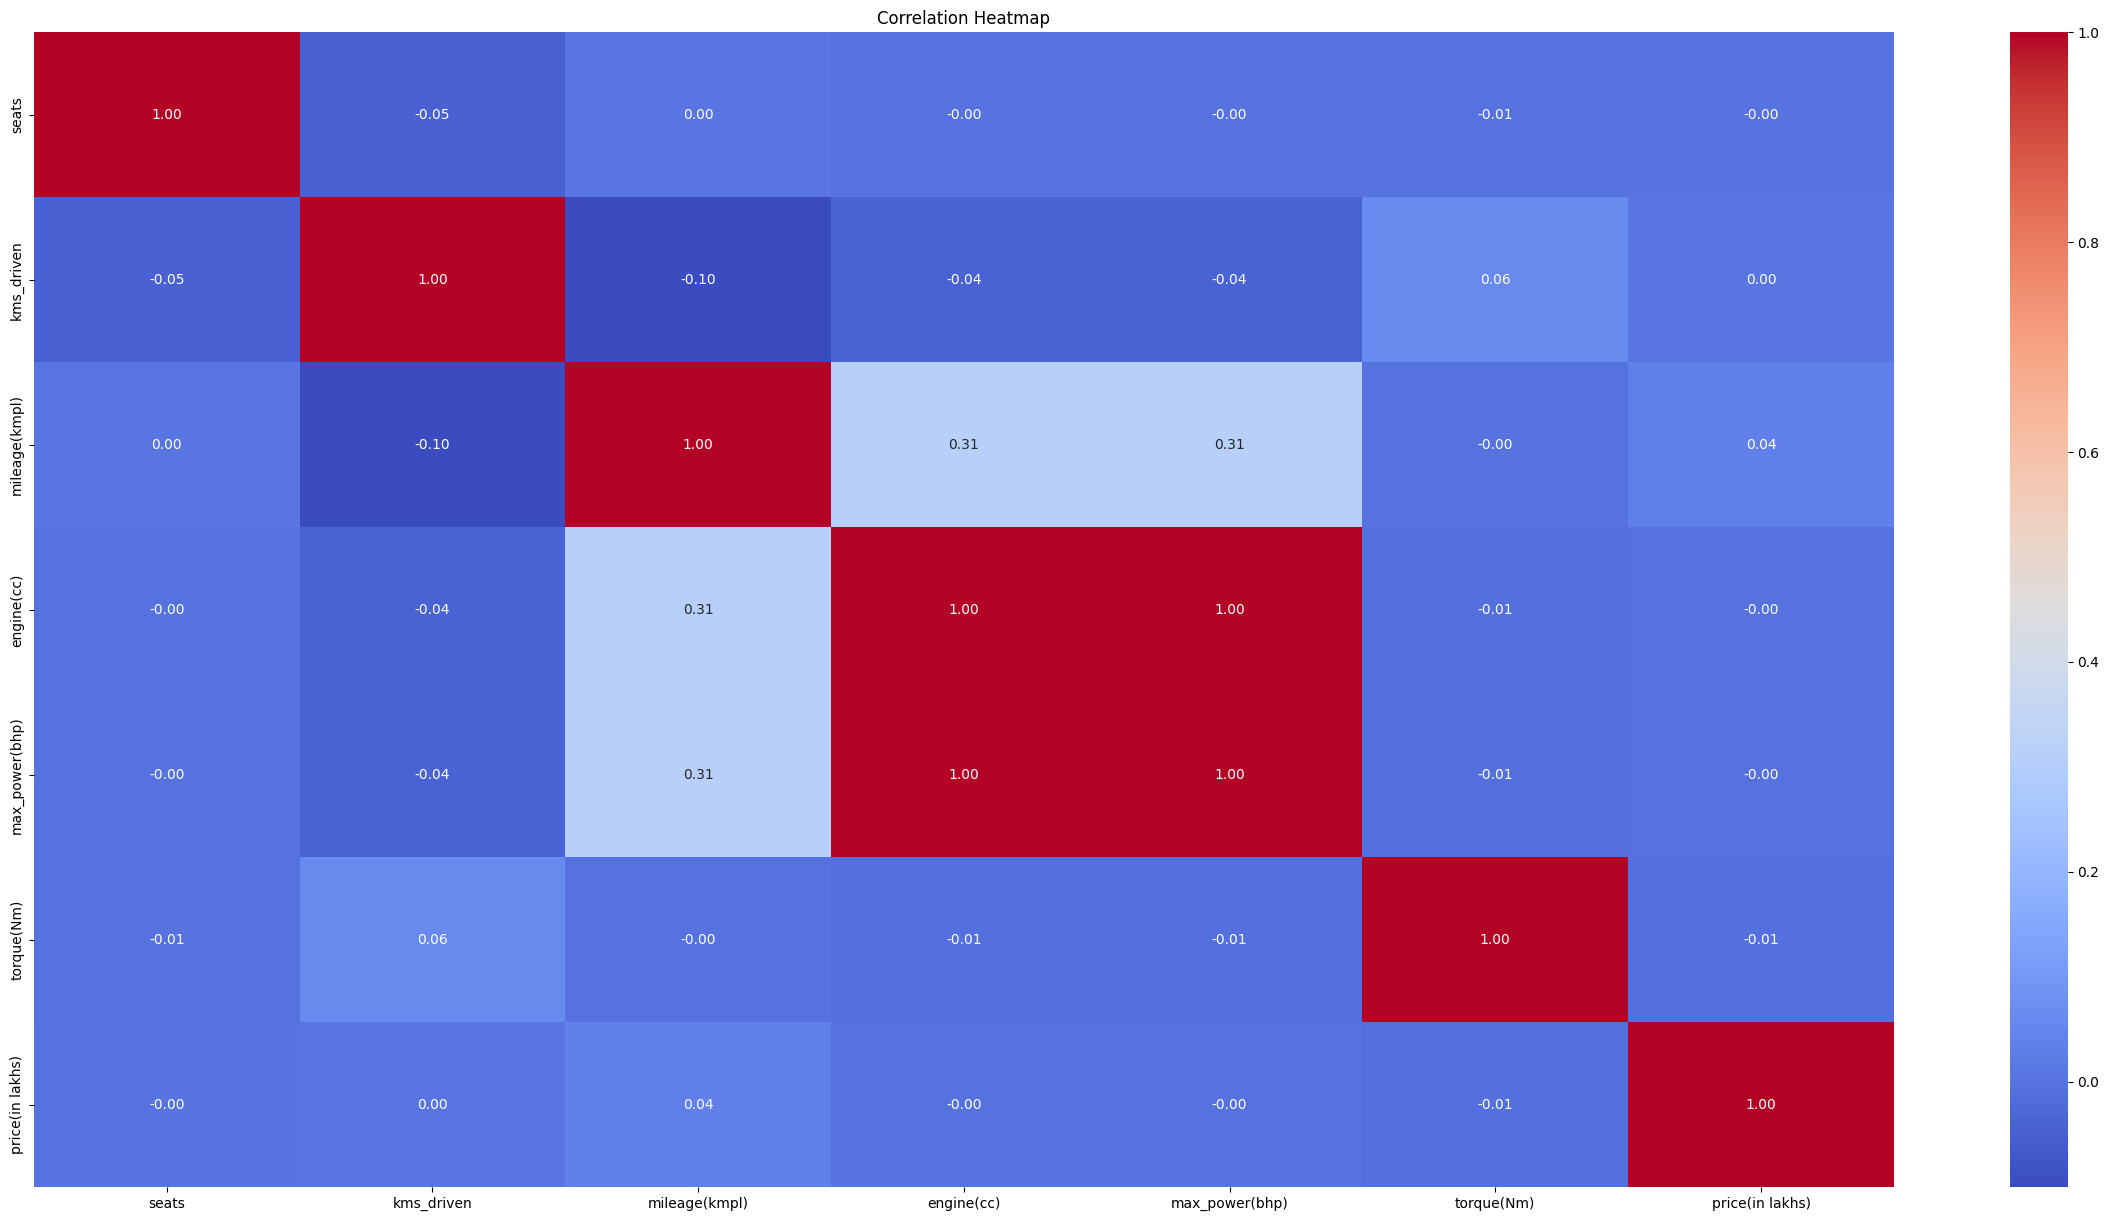

In [15]:
# Correlation heatmap for numeric columns
correlation_matrix = df.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



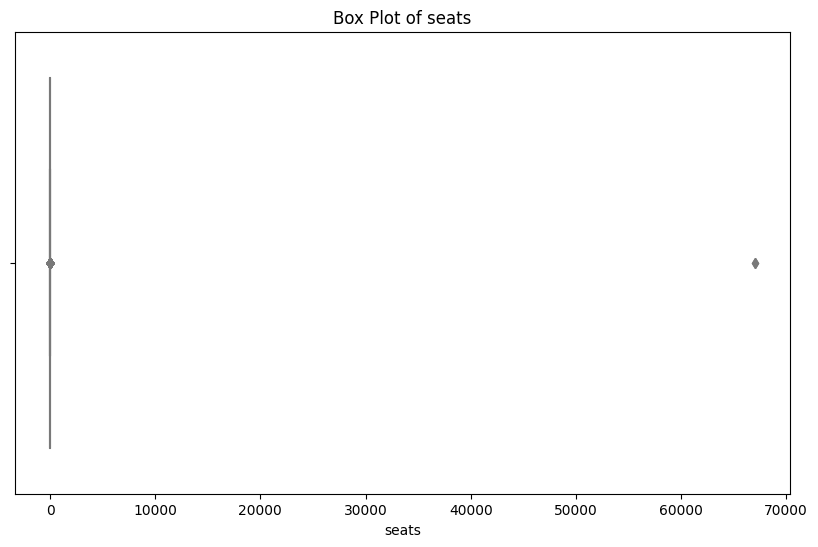

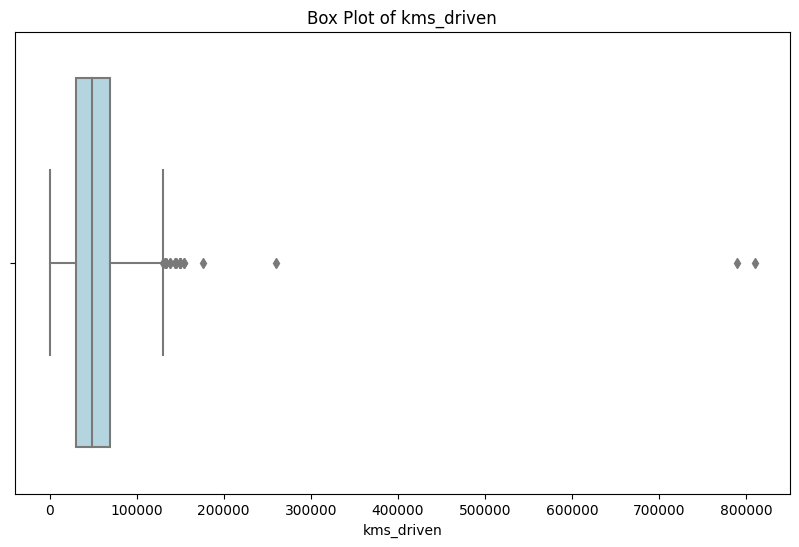

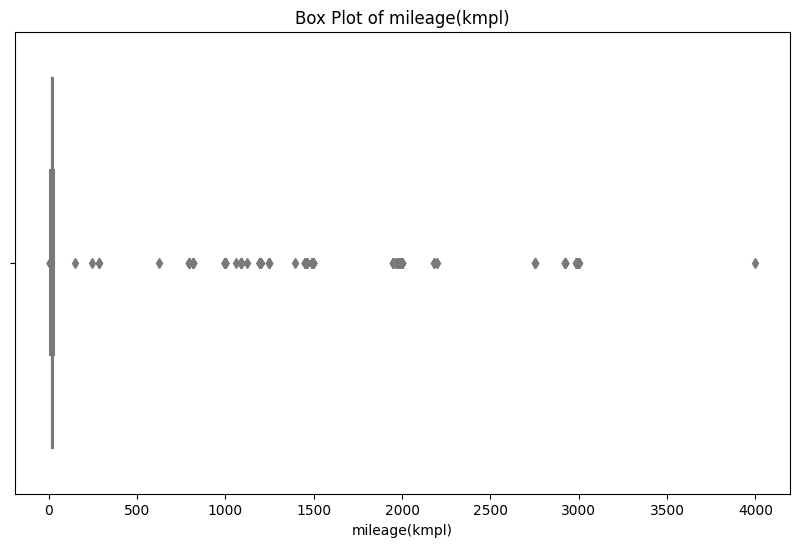

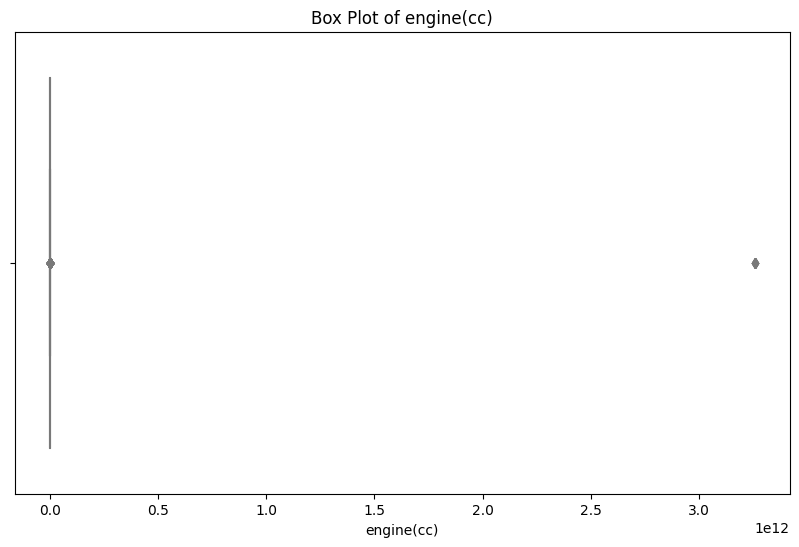

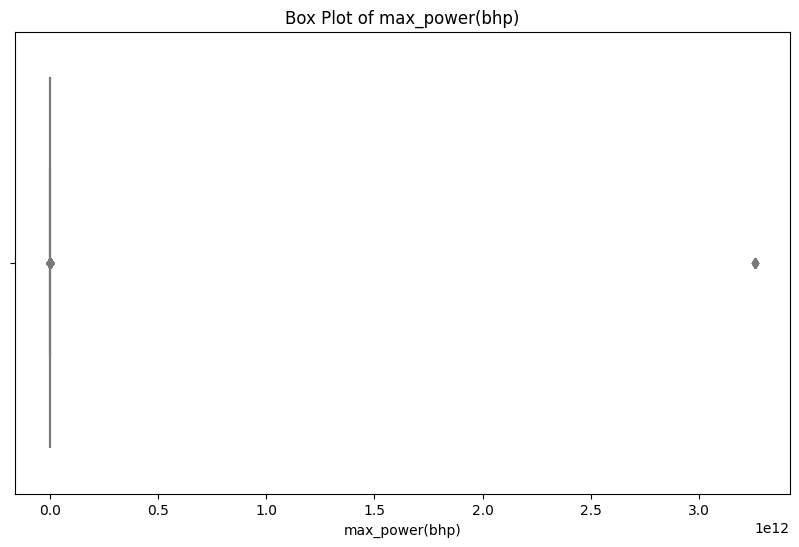

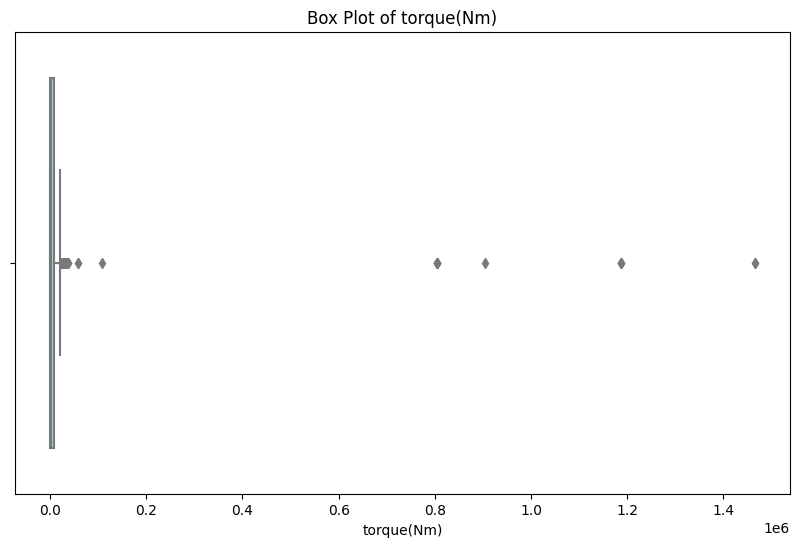

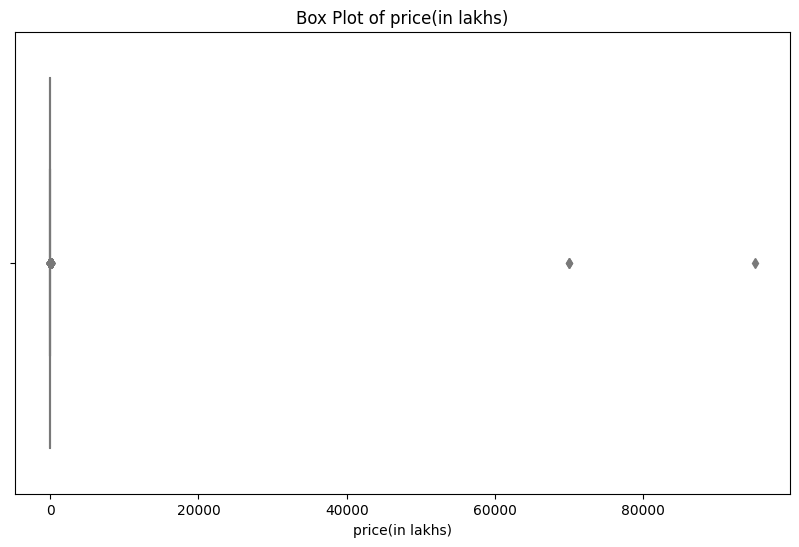

In [16]:
# Box plots for numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column], color='lightblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


In [17]:
print(df.dtypes)
print(df.shape)

car_name                      object
registration_year     datetime64[ns]
insurance_validity            object
fuel_type                     object
seats                          int64
kms_driven                     int64
ownsership                    object
transmission                  object
manufacturing_year            object
mileage(kmpl)                float64
engine(cc)                   float64
max_power(bhp)               float64
torque(Nm)                   float64
price(in lakhs)              float64
dtype: object
(1549, 14)


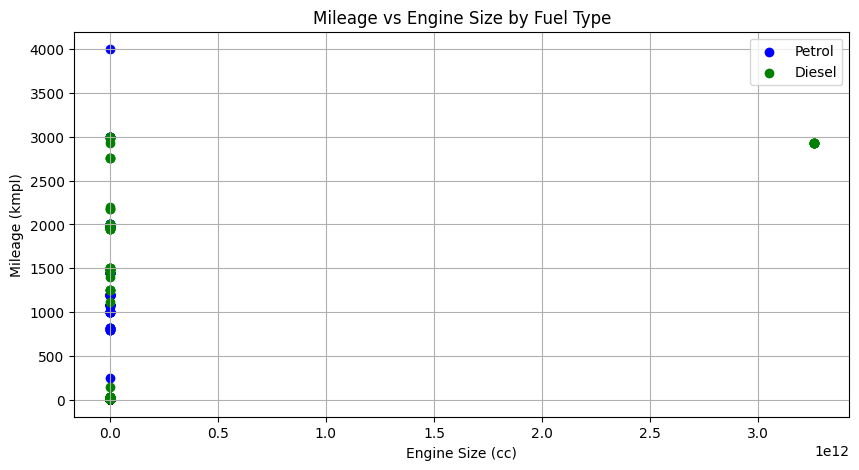

In [18]:
import matplotlib.pyplot as plt
import pandas as pd



# Create a color map for fuel types
color_map = {'Petrol': 'blue', 'Diesel': 'green'}
plt.figure(figsize=(10, 5))
# Plotting
for fuel_type, color in color_map.items():
    fuel_df = df[df['fuel_type'] == fuel_type]
    plt.scatter(fuel_df['engine(cc)'], fuel_df['mileage(kmpl)'], color=color, marker='o', label=fuel_type)

plt.title('Mileage vs Engine Size by Fuel Type')
plt.xlabel('Engine Size (cc)')
plt.ylabel('Mileage (kmpl)')
plt.legend()
plt.grid(True)
plt.show()

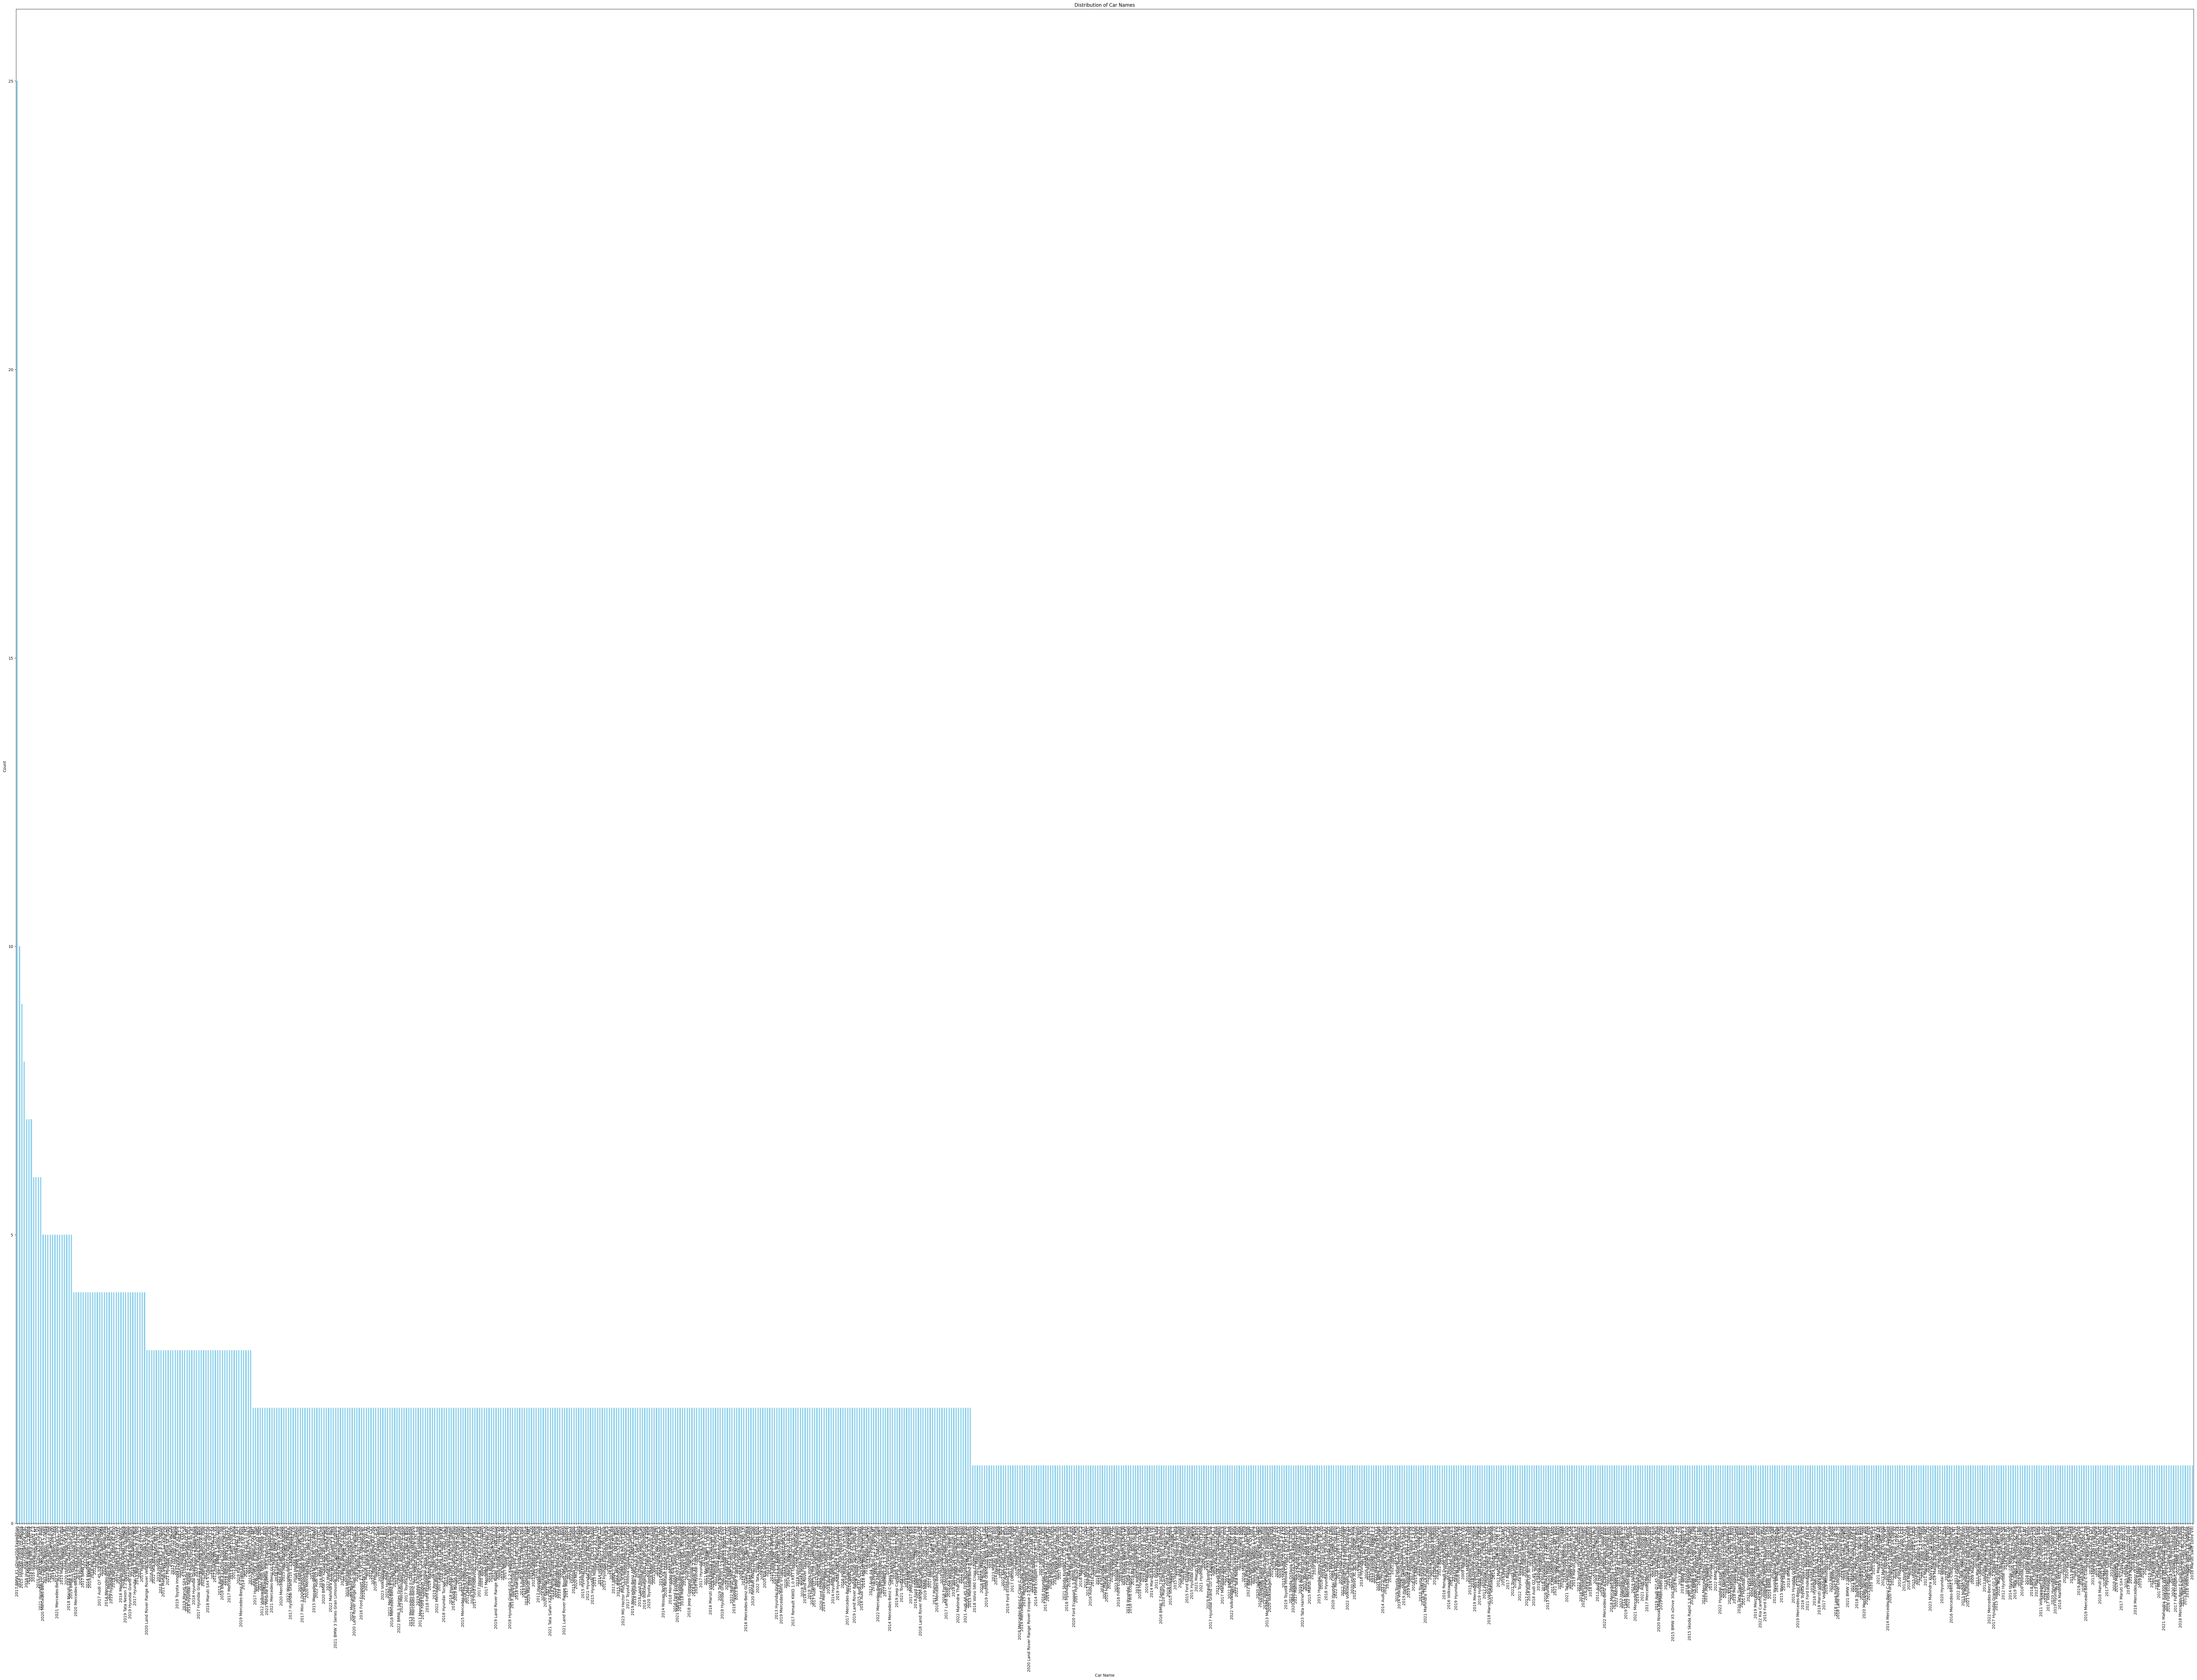

In [20]:
plt.figure(figsize=(100, 70))
df['car_name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Car Names')
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.show()


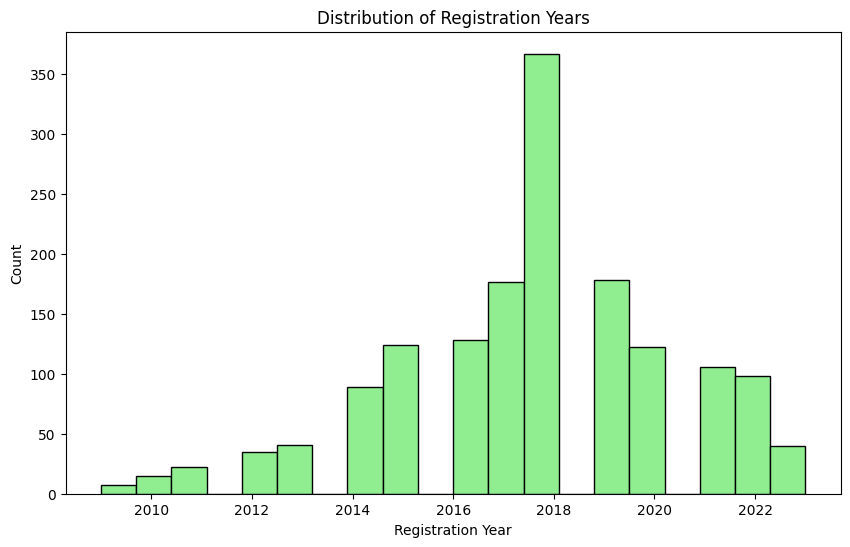

In [21]:
df['registration_year'] = df['registration_year'].dt.year
plt.figure(figsize=(10, 6))
plt.hist(df['registration_year'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Registration Years')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.show()


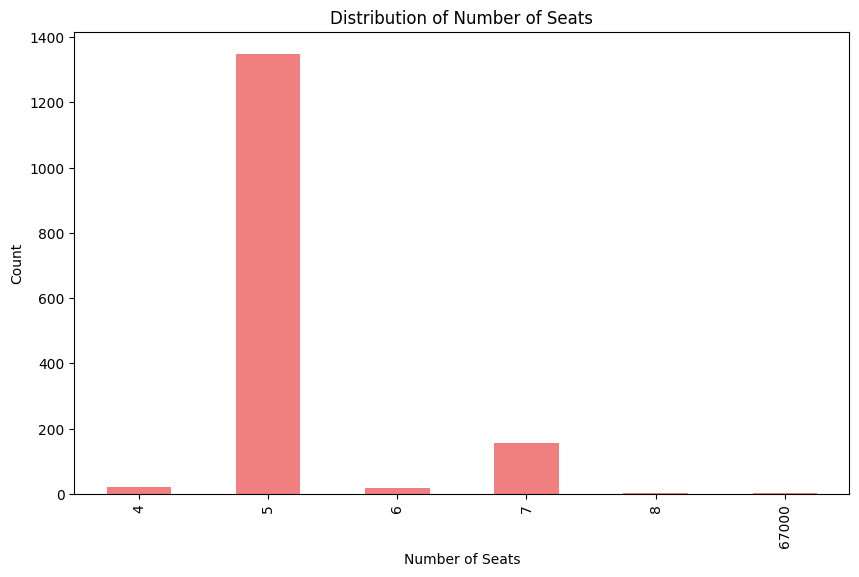

In [24]:
plt.figure(figsize=(10, 6))
df['seats'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.show()

